In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
import re
import math
# Function to process the values
def clean_and_floor(value):
    if pd.isna(value):  # Check for NaN
        return value
    # Remove all characters except digits and decimal point
    cleaned_value = re.sub(r'[^\d.]', '', str(value))
    if cleaned_value:  # Check if anything is left after cleaning
        # Convert to float and take floor value
        return math.floor(float(cleaned_value))
    return None  # Return None for completely invalid values

In [ ]:
# def IQR_calc(value) :
#     # Calculate Q1, Q3, and IQR
#     Q1 = value.quantile(0.25)
#     Q3 = value.quantile(0.75)
#     IQR = Q3 - Q1

#     # Define lower and upper bounds
#     #lower_bound = Q1 - 3 * IQR
#     upper_bound = Q3 + 3 * IQR
#     return upper_bound
   

In [3]:
# Categorizing numerical to categorical

def family_categorize(x):
    if x <= 1:
        return('upto_1_member')
    elif x == 2:
        return('2_members')
    elif x == 3:
        return('3_members')
    else :
        return('more_than_3_members')
    

In [4]:
# Categorizing numerical to categorical

def annuity_categorize(x):
    if x <= 2:
        return('upto_2_percent')
    elif x <= 4:
        return('upto_4_percent')
    elif x <= 6:
        return('upto_6_percent')
    elif x <= 8:
        return('upto_8_percent')
    else :
        return('more_than_8_percent')
    

In [4]:
df = pd.read_csv('Dataset.csv')

C:\Users\biswa\AppData\Local\Temp\ipykernel_14124\1385207280.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset.csv')


In [33]:
df['Credit_Bureau'].unique()

array([nan,  0.,  3.,  1.,  4.,  5.,  6.,  2.,  9., 13.,  7.,  8., 14.,
       11., 19., 10., 12., 15., 17., 21., 22., 16.])

In [14]:
import pandas as pd

# Drop columns that are completely NaN (optional)
df = df.dropna(axis=1, how='all')

# 1. Drop rows with any NaNs (only if you want to exclude incomplete rows)
df_clean = df.dropna()

# 2. Identify numerical columns
numerical_cols = df_clean.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:")
print(numerical_cols)

# 3. Identify categorical columns
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical columns:")
print(categorical_cols)

# 4. Show unique values in each categorical column
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    unique_vals = df_clean[col].unique()
    print(f"{col}: {unique_vals}")


Numerical columns:
['ID', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count', 'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1', 'Score_Source_2', 'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau', 'Default']

Categorical columns:
['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Client_Occupation', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_3']

Unique values in categorical columns:
Client_Income: ['27000' '18000' '15750' '18900' '63000' '27900' '9000' '20250' '22500'
 '6750' '31500' '11250' '11700' '24750' '32400' '38250' '21600' '23400'


In [10]:
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [8]:
# Apply the function to the column
df['Client_Income'] = df['Client_Income'].apply(clean_and_floor)

print("Processed DataFrame:")
print(df['Client_Income'])

Processed DataFrame:
0          6750.0
1         20250.0
2         18000.0
3         15750.0
4         33750.0
           ...   
121851    29250.0
121852    15750.0
121853     8100.0
121854    38250.0
121855     9000.0
Name: Client_Income, Length: 121856, dtype: float64


In [16]:
## Replacing the null values with mode value 

df['Client_Income'] = df['Client_Income'].fillna(df['Client_Income'].mode().iloc[0])

In [9]:
df['Client_Income'].mode().iloc[0]

np.float64(13500.0)

In [13]:
# Categorizing numerical to categorical

def income_category(x):
    if x <= 6000:
        return('income_band1')
    elif x <= 10000:
        return('income_band2')
    elif x <= 15000:
        return('income_band3')
    elif x <= 20000:
        return('income_band4')
    elif x <= 50000:
        return('income_band5')
    else :
        return('income_band6')
    

In [17]:
df['Client_Income_category'] = df['Client_Income'].apply(income_category)

In [18]:
df['Client_Income_category'].value_counts()

Client_Income_category
income_band3    38835
income_band5    32738
income_band4    24658
income_band2    21227
income_band1     3345
income_band6     1053
Name: count, dtype: int64

In [ ]:
 # Clip values outside the bounds
#df['Client_Income_clipped'] = df['Client_Income'].clip(upper=IQR_calc(df['Client_Income']))

In [19]:
# Applying the function to the column Credit_Amount
df['Credit_Amount'] = df['Credit_Amount'].apply(clean_and_floor)

print("Processed DataFrame:")
print(df['Credit_Amount'])

Processed DataFrame:
0          61190.0
1          15282.0
2          59527.0
3          53870.0
4         133988.0
            ...   
121851    107820.0
121852    104256.0
121853     55107.0
121854     45000.0
121855     62428.0
Name: Credit_Amount, Length: 121856, dtype: float64


In [20]:
## Replacing the null values with mode value 

df['Credit_Amount'] = df['Credit_Amount'].fillna(df['Credit_Amount'].mode().iloc[0])

In [21]:
# Categorizing numerical to categorical

def credit_category(x):
    if x <= 20000:
        return('credit_band1')
    elif x <= 30000:
        return('credit_band2')
    elif x <= 40000:
        return('credit_band3')
    elif x <= 50000:
        return('credit_band4')
    elif x <= 60000:
        return('credit_band5')
    else :
        return('credit_band6')
    

In [22]:
df['Credit_Amount_category'] = df['Credit_Amount'].apply(credit_category)

In [23]:
df['Credit_Amount_category'].value_counts()

Credit_Amount_category
credit_band6    47758
credit_band2    21125
credit_band4    15830
credit_band1    13769
credit_band5    13166
credit_band3    10208
Name: count, dtype: int64

In [24]:
df['Credit_to_Income_Ratio'] = (df['Credit_Amount']/df['Client_Income']).round(2)

In [25]:
# Categorizing numerical to categorical

def credit_income_category(x):
    if x <= 2:
        return('Upto_2_times')
    elif x <= 3:
        return('Upto_3_times')
    elif x <= 4:
        return('Upto_4_times')
    elif x <= 5:
        return('Upto_5_times')
    elif x <= 10:
        return('Upto_10_times')
    else :
        return('more_than_10_times')
    

In [26]:
df['Credit_to_Income_Category'] = df['Credit_to_Income_Ratio'].apply(credit_income_category)

In [27]:
df['Credit_to_Income_Category'].value_counts()

Credit_to_Income_Category
Upto_2_times          29956
Upto_10_times         27989
Upto_3_times          25662
Upto_4_times          19990
Upto_5_times          14448
more_than_10_times     3811
Name: count, dtype: int64

In [ ]:
 # Clip values outside the bounds
#df['Credit_Amount_clipped'] = df['Credit_Amount'].clip(upper=IQR_calc(df['Credit_Amount']))

In [28]:
# Apply the function to the column
df['Loan_Annuity'] = df['Loan_Annuity'].apply(clean_and_floor)

print("Processed DataFrame:")
print(df['Loan_Annuity'])

Processed DataFrame:
0         3416.0
1         1826.0
2         2788.0
3         2295.0
4         3547.0
           ...  
121851    3165.0
121852    3388.0
121853    2989.0
121854    2719.0
121855    4201.0
Name: Loan_Annuity, Length: 121856, dtype: float64


In [29]:
## Replacing the null values with mode value 

df['Loan_Annuity'] = df['Loan_Annuity'].fillna(df['Loan_Annuity'].mode().iloc[0])

In [30]:
# Calculate Loan_Annuity_percent

df['Loan_Annuity_percent'] = ((df['Loan_Annuity'] / df['Credit_Amount']) * 100).round(2)

In [31]:
df['Loan_Annuity_percent'].head(20)

0      5.58
1     11.95
2      4.68
3      4.26
4      2.65
5      4.75
6      2.93
7      5.13
8      2.67
9      7.93
10     5.00
11     2.93
12     6.73
13     4.25
14     4.65
15     4.25
16     7.52
17     5.00
18     6.68
19     9.74
Name: Loan_Annuity_percent, dtype: float64

In [32]:
df['Loan_Annuity_category']=df['Loan_Annuity_percent'].apply(annuity_categorize)

In [33]:
df['Loan_Annuity_category'].value_counts()

Loan_Annuity_category
upto_6_percent         47044
upto_4_percent         38511
upto_8_percent         17821
more_than_8_percent    15326
upto_2_percent          3154
Name: count, dtype: int64

In [34]:
# Replace null values in Client_Family_Members based on Client_Marital_Status
df['Client_Family_Members'] = df['Client_Family_Members'].fillna(
    df.apply(
        lambda row: row['Child_Count'] + 1 if row['Client_Marital_Status'] == 'M'
        else row['Child_Count'] if row['Client_Marital_Status'] in ['S', 'D', 'W']
        else np.nan,
        axis=1
    )
)

In [35]:
# Replace null values in Client_Family_Members with Child_Count + 1
df['Client_Family_Members'] = df['Client_Family_Members'].fillna(df['Child_Count'] + 1)

In [36]:
df['Client_Family_Members'] = df['Client_Family_Members'].fillna(0)

In [37]:
df['Client_Family_Members_Category'] = df['Client_Family_Members'].apply(family_categorize)

In [38]:
df['Client_Family_Members_Category'].value_counts()

Client_Family_Members_Category
2_members              62064
upto_1_member          27968
3_members              20639
more_than_3_members    11185
Name: count, dtype: int64

In [39]:
df['Client_Family_Members'].isna().sum()

np.int64(0)

In [40]:
# Filling null values with 0 assuming no such loan exists for the customer

df['Car_Owned'] = df['Car_Owned'].fillna(0)
df['Bike_Owned'] = df['Bike_Owned'].fillna(0)
df['Active_Loan'] = df['Active_Loan'].fillna(0)

# Changing the data type to int

df['Car_Owned'] = df['Car_Owned'].astype(int)
df['Bike_Owned'] = df['Bike_Owned'].astype(int)
df['Active_Loan'] = df['Active_Loan'].astype(int)

In [41]:
# Fill null values in House_Own with 1 where Own_House_Age is not null
df['House_Own'] = df['House_Own'].fillna(df['Own_House_Age'].notnull().astype(int))


In [42]:
# Replace missing values and "##" with "Others"
df['Accompany_Client'] = df['Accompany_Client'].replace({np.nan: 'Others', '##': 'Others'})

In [43]:
# Replace missing values  "##" with "Others"
df['Client_Income_Type'] = df['Client_Income_Type'].replace({np.nan: 'Govt_job_others', 
                                                         'Student': 'Govt_job_others', 
                                                         'Unemployed': 'Govt_job_others', 
                                                         'Maternity leave': 'Govt_job_others',
                                                         'Businessman': 'Govt_job_others',
                                                            'Govt Job' : 'Govt_job_others'})

In [44]:
df['Client_Education'] = df['Client_Education'].fillna('Others')

In [45]:
## Replacing the null values with mode 

df['Client_Marital_Status'] = df['Client_Marital_Status'].fillna(df['Client_Marital_Status'].mode().iloc[0])

In [46]:
df=df.drop(columns = 'Client_Gender')

In [47]:
## Replacing the null values with mode 

df['Loan_Contract_Type'] = df['Loan_Contract_Type'].fillna(df['Loan_Contract_Type'].mode().iloc[0])

In [48]:
## Replacing the null values with mode 

df['Client_Housing_Type'] = df['Client_Housing_Type'].fillna(df['Client_Housing_Type'].mode().iloc[0])

In [49]:
df = df.drop(columns='Population_Region_Relative')

In [50]:
# Convert Registration_Days to numeric, coercing errors to NaN
df['Registration_Days'] = pd.to_numeric(df['Registration_Days'], errors='coerce')

# Convert ID_Days to numeric, coercing errors to NaN
df['ID_Days'] = pd.to_numeric(df['ID_Days'], errors='coerce')



In [51]:
## Replacing the null values with mode 

df['Registration_Days'] = df['Registration_Days'].fillna(df['Registration_Days'].mode().iloc[0])

df['ID_Days'] = df['ID_Days'].fillna(df['ID_Days'].mode().iloc[0])

In [52]:
df['Registration_Years'] = (df['Registration_Days']/365).round(0)

In [53]:
# Categorizing numerical to categorical

def registration_category(x):
    if x <= 5:
        return('upto_5_years')
    elif x <= 10:
        return('upto_10_years')
    elif x <= 15:
        return('upto_15_years')
    elif x <= 20:
        return('upto_20_years')
    elif x <= 30:
        return('upto_30_years')
    else :
        return('more_than_30_years')
    

In [54]:
df['Registration_Years_Category'] = df['Registration_Years'].apply(registration_category)

In [55]:
df['ID_Years'] = (df['ID_Days']/365).round(0)

In [56]:
# Categorizing numerical to categorical

def id_years_category(x):
    if x <= 5:
        return('upto_5_years')
    elif x <= 10:
        return('upto_10_years')
    else :
        return('more_than_10_years')
    

In [57]:
df['ID_Years_Category'] = df['ID_Years'].apply(id_years_category)

In [58]:
df['ID_Years_Category'].value_counts()

ID_Years_Category
more_than_10_years    53055
upto_5_years          34406
upto_10_years         34395
Name: count, dtype: int64

In [59]:
# Replace the value 365243 in the Employed_Days column
df['Employed_Days'] = df['Employed_Days'].replace('365243', '0')  # Replace with 0

df['Employed_Days'] = pd.to_numeric(df['Employed_Days'],errors = 'coerce')

df['Employed_Days'] = df['Employed_Days'].fillna(0)

df['Employed_Days'] = (df['Employed_Days']/365).round(0)

df.loc[df['Employed_Days'] > 60, 'Employed_Days'] = 0



In [60]:
def convert_employment_days(x) :
    if x == 0:
        return('no_emplyment')
    elif x <= 2:
        return('upto_2_years')
    elif x <= 5:
        return('upto_5_years')
    elif x <= 10:
        return('upto_10_years')
    else :
        return('more_than_5_years')
    

In [61]:
df['Employed_Days_Category'] = df['Employed_Days'].apply(convert_employment_days)

In [62]:
# Impute Age_Days where the conditions are met
df['Age_Days'] = df.apply(
    lambda row: row['Employed_Days'] + 6570 if pd.isnull(row['Age_Days']) and row['Employed_Days'] > 0 else row['Age_Days'],
    axis=1
)

df['Age_Days'] = pd.to_numeric(df['Age_Days'],errors = 'coerce')

df['Age_Days']  = df['Age_Days'].fillna(6570)

df['Age_Days'] = (df['Age_Days']/365).round(0)

In [63]:
def convert_age_days(x) :
    if x <= 30:
        return('upto_30_years')
    elif x <= 40:
        return('upto_40_years')
    elif x <= 50:
        return('upto_50_years')
    else :
        return('more_than_50_years')
    

In [64]:
df['Age_Days_Category'] = df['Age_Days'].apply(convert_age_days)

In [65]:
# Fill null values in House_Own with 1 where Own_House_Age is not null

df['House_Own'] = df['House_Own'].fillna(df['Own_House_Age'].notnull().astype(int))


In [66]:
df=df.drop(columns='Own_House_Age')

In [67]:
df['Client_Occupation'] = df['Client_Occupation'].fillna(df['Client_Income_Type'])

In [68]:
df['Cleint_City_Rating'] = df['Cleint_City_Rating'].fillna(1.0) 

In [69]:
df['Application_Process_Day'] = df['Application_Process_Day'].fillna(df['Application_Process_Day'].mode().iloc[0])

df['Application_Process_Hour'] = df['Application_Process_Hour'].fillna(df['Application_Process_Hour'].mode().iloc[0])

In [70]:
def application_hour_category(x) :
    if x <= 6:
        return('upto_6_hours')
    elif x <= 12:
        return('upto_12_hours')
    elif x <= 18:
        return('upto_18_hours')
    else :
        return('more_than_18_hours')
    

In [71]:
df['Application_Hour_Category'] = df['Application_Process_Hour'].apply(application_hour_category)

In [73]:
df['Application_Hour_Category'].value_counts()

Application_Hour_Category
upto_12_hours         65305
upto_18_hours         49138
upto_6_hours           5210
more_than_18_hours     2203
Name: count, dtype: int64

In [74]:
# Replace missing values  "XNA" with "null"
df['Type_Organization'] = df['Type_Organization'].replace('XNA' , np.nan)

In [75]:
# Define a mapping between Client_Occupation and Type_Organization
occupation_to_organization = {
    'Retired': 'Self-employed',
    'Sales': 'Sales',
    'Private service': 'Services',
    'Govt_job_others': 'Government',
    'Laborers': 'Construction',
    'Service': 'Services',
    'Drivers': 'Transport: type 1',
    'Managers': 'Managers',
    'Accountants': 'Bank',
    'High skill tech': 'IT',
    'Security': 'Security',
    'Commercial': 'Trade: type 3',
    'Core': 'Industry: type 1',
    'Low-skill Laborers': 'Construction',
    'Medicine': 'Medicine',
    'Cooking': 'Restaurant',
    'Secretaries': 'Services',
    'Waiters/barmen': 'Restaurant',
    'Cleaning': 'Cleaning',
    'IT': 'IT',
    'Realty agents': 'Realtor',
    'HR': 'Services',
}

In [76]:
# Fill null values in Type_Organization with corresponding Client_Occupation values using the mapping
df['Type_Organization'] = df.apply(
    lambda row: occupation_to_organization.get(row['Client_Occupation'], row['Type_Organization'])
    if pd.isnull(row['Type_Organization']) else row['Type_Organization'],
    axis=1
)

In [77]:
# Grouping similar Type_Organization values

group_mapping = {
    'Self-employed': 'Self-employed',
    'Business Entity Type 1': 'Business',
    'Business Entity Type 2': 'Business',
    'Business Entity Type 3': 'Business',
    'Government': 'Public Sector',
    'Military': 'Public Sector',
    'Police': 'Public Sector',
    'Security Ministries': 'Public Sector',
    'School': 'Education',
    'University': 'Education',
    'Kindergarten': 'Education',
    'Medicine': 'Healthcare',
    'Restaurant': 'Hospitality',
    'Hotel': 'Hospitality',
    'Cleaning': 'Services',
    'Services': 'Services',
    'Transport: type 1': 'Transport',
    'Transport: type 2': 'Transport',
    'Transport: type 3': 'Transport',
    'Transport: type 4': 'Transport',
    'Construction': 'Construction',
    'Agriculture': 'Agriculture',
    'Bank': 'Finance',
    'Insurance': 'Finance',
    'Telecom': 'Telecommunication',
    'IT': 'Technology',
    'Realtor': 'Real Estate',
    'Trade: type 1': 'Trade',
    'Trade: type 2': 'Trade',
    'Trade: type 3': 'Trade',
    'Trade: type 4': 'Trade',
    'Trade: type 5': 'Trade',
    'Trade: type 6': 'Trade',
    'Trade: type 7': 'Trade',
    'Industry: type 1': 'Industry',
    'Industry: type 2': 'Industry',
    'Industry: type 3': 'Industry',
    'Industry: type 4': 'Industry',
    'Industry: type 5': 'Industry',
    'Industry: type 6': 'Industry',
    'Industry: type 7': 'Industry',
    'Industry: type 8': 'Industry',
    'Industry: type 9': 'Industry',
    'Industry: type 10': 'Industry',
    'Industry: type 11': 'Industry',
    'Industry: type 12': 'Industry',
    'Industry: type 13': 'Industry',
    'Sales': 'Trade',
    'Advertising': 'Media',
    'Culture': 'Art & Culture',
    'Religion': 'Other',
    'Legal Services': 'Legal',
    'Emergency': 'Emergency Services',
    'Housing': 'Real Estate',
    'Other': 'Other'
}

In [78]:
# Apply the mapping to create a new grouped category column
df['Type_Organization_Grouped'] = df['Type_Organization'].map(group_mapping)


In [79]:
df['Type_Organization_Grouped'] = df['Type_Organization_Grouped'].fillna('Other')

In [80]:
df=df.drop(columns='Score_Source_1')  # removing Score_Source_1 column

In [81]:
df['Score_Source_2'] = df['Score_Source_2'].fillna(df['Score_Source_2'].mean()) # imputing NAN with mean

In [82]:
df['Score_Source_3'] = pd.to_numeric(df['Score_Source_3'],errors= 'coerce')

In [83]:
df['Score_Source_3'] = df['Score_Source_3'].fillna(df['Score_Source_3'].mean()) # imputing NAN with mean

In [84]:
df['Social_Circle_Default'] = df['Social_Circle_Default'].fillna(0) # Imputing NAN with 0 

# Update 'Social_Circle_Default' column based on condition
df['Social_Circle_Default'] = np.where(df['Social_Circle_Default'] == 0, 0, 1)


In [85]:
df['Phone_Change'] = df['Phone_Change'].fillna(0) # Imputing NAN with 0 

In [86]:
def year_categorize(x):
    if x == 0:
        return('same_year')
    elif x == 1:
        return('one_year')
    elif x == 2:
        return('two_year')
    elif x == 3:
        return('three_year')
    elif x == 4:
        return('four_year')
    else :
        return('more_than_four')
    

In [87]:
df['Phone_Change_category'] = (df['Phone_Change']/365).astype(int).apply(year_categorize)

In [88]:
df['Credit_Bureau'] = df['Credit_Bureau'].fillna(0) # Imputing NAN with 0

In [89]:
# Categorizing numerical to categorical

def bureau_categorize(x):
    if x == 0:
        return('no_search')
    elif x == 1:
        return('one_search')
    elif x == 2:
        return('two_search')
    else :
        return('more_than_two_search')
    

In [90]:
df['Credit_Bureau_Category'] = df['Credit_Bureau'].astype(int).apply(bureau_categorize)

In [91]:
df.isna().sum()

ID                                   0
Client_Income                        0
Car_Owned                            0
Bike_Owned                           0
Active_Loan                          0
House_Own                            0
Child_Count                       3638
Credit_Amount                        0
Loan_Annuity                         0
Accompany_Client                     0
Client_Income_Type                   0
Client_Education                     0
Client_Marital_Status                0
Loan_Contract_Type                   0
Client_Housing_Type                  0
Age_Days                             0
Employed_Days                        0
Registration_Days                    0
ID_Days                              0
Mobile_Tag                           0
Homephone_Tag                        0
Workphone_Working                    0
Client_Occupation                    0
Client_Family_Members                0
Cleint_City_Rating                   0
Application_Process_Day  

In [92]:
# List of columns to select
columns_to_select = [
    'Client_Income_category', 'Credit_Amount_category', 'Credit_to_Income_Category',
    'Loan_Annuity_category', 'Client_Family_Members_Category', 'Car_Owned', 'Bike_Owned',
    'Active_Loan', 'Accompany_Client', 'Client_Income_Type', 'Client_Education',
    'Client_Marital_Status', 'Loan_Contract_Type', 'Client_Housing_Type',
    'Registration_Years_Category', 'ID_Years_Category', 'Employed_Days_Category',
    'Age_Days_Category', 'House_Own', 'Client_Occupation', 'Cleint_City_Rating',
    'Application_Process_Day', 'Application_Hour_Category', 'Type_Organization_Grouped',
    'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default',
    'Phone_Change_category', 'Credit_Bureau_Category', 'Default'
]

# Select specified columns
selected_df = df[columns_to_select]

# View the selected DataFrame
print(selected_df.head())


  Client_Income_category Credit_Amount_category Credit_to_Income_Category  \
0           income_band2           credit_band6             Upto_10_times   
1           income_band5           credit_band1              Upto_2_times   
2           income_band4           credit_band5              Upto_4_times   
3           income_band4           credit_band5              Upto_4_times   
4           income_band5           credit_band6              Upto_4_times   

  Loan_Annuity_category Client_Family_Members_Category  Car_Owned  Bike_Owned  \
0        upto_6_percent                      2_members          0           0   
1   more_than_8_percent                      2_members          1           0   
2        upto_6_percent                      2_members          0           0   
3        upto_6_percent                      2_members          0           0   
4        upto_4_percent            more_than_3_members          1           0   

   Active_Loan Accompany_Client Client_Income_Type

In [93]:
selected_df.isna().sum()

Client_Income_category            0
Credit_Amount_category            0
Credit_to_Income_Category         0
Loan_Annuity_category             0
Client_Family_Members_Category    0
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
Accompany_Client                  0
Client_Income_Type                0
Client_Education                  0
Client_Marital_Status             0
Loan_Contract_Type                0
Client_Housing_Type               0
Registration_Years_Category       0
ID_Years_Category                 0
Employed_Days_Category            0
Age_Days_Category                 0
House_Own                         0
Client_Occupation                 0
Cleint_City_Rating                0
Application_Process_Day           0
Application_Hour_Category         0
Type_Organization_Grouped         0
Score_Source_2                    0
Score_Source_3                    0
Social_Circle_Default             0
Phone_Change_category       

In [94]:
selected_df.to_csv('processed_data.csv',index=False)

In [245]:
df['Age_Days'].dtype

dtype('O')

In [308]:
df['Type_Organization_Grouped'].isna().sum()

2931

In [309]:
df['Type_Organization_Grouped'].value_counts()

Type_Organization_Grouped
Self-employed         35762
Business              32718
Public Sector          7464
Education              6616
Other                  6327
Trade                  5993
Industry               5729
Healthcare             4401
Transport              3665
Construction           3246
Finance                1354
Real Estate            1325
Hospitality            1183
Services               1152
Agriculture            1011
Telecommunication       225
Emergency Services      207
Media                   152
Technology              145
Art & Culture           131
Legal                   119
Name: count, dtype: int64

In [278]:
df['Client_Occupation'].unique()

array(['Sales', 'Service', 'Realty agents', 'Retired', 'Laborers', 'Core',
       'Drivers', 'Managers', 'Accountants', 'High skill tech',
       'Cleaning', 'Commercial', 'HR', 'Waiters/barmen',
       'Low-skill Laborers', 'Medicine', 'Cooking', 'Govt_job_others',
       'Private service', 'Security', 'IT', 'Secretaries'], dtype=object)

In [252]:
import re

# Define a function to find special characters in a column
def find_special_characters(column):
    # Combine all values into a single string and find special characters using regex
    all_values = ''.join(column.dropna().astype(str))  # Drop NaN and convert to string
    special_chars = re.findall(r'[^\w\s]', all_values)  # Match non-alphanumeric, non-whitespace characters
    return set(special_chars)  # Return unique special characters

# Apply the function to 'Age_Days'
special_characters = find_special_characters(df['Age_Days'])

# Print the results
if special_characters:
    print(f"Special characters found in 'Age_Days': {special_characters}")
else:
    print("No special characters found in 'Age_Days'.")


Special characters found in 'Age_Days': {'.'}


In [20]:
df.Own_House_Age.value_counts()

Own_House_Age
7.0     3015
3.0     2555
6.0     2525
2.0     2321
8.0     2302
4.0     2175
9.0     2053
1.0     2041
10.0    1945
14.0    1855
13.0    1800
12.0    1692
11.0    1644
5.0     1433
15.0    1415
16.0    1347
17.0    1193
64.0     974
18.0     919
0.0      859
19.0     740
20.0     644
21.0     591
22.0     490
24.0     457
23.0     420
65.0     392
25.0     353
26.0     225
28.0     221
27.0     182
29.0     156
30.0     129
31.0     121
32.0      87
35.0      75
33.0      68
34.0      67
36.0      57
39.0      40
38.0      37
40.0      37
37.0      32
41.0      30
42.0      13
43.0      10
44.0       8
54.0       5
63.0       2
50.0       2
57.0       2
46.0       2
45.0       1
49.0       1
69.0       1
Name: count, dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# 1. Basic Information
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  

In [4]:
# 2. Target Variable Analysis
target_column = 'Default'  # Replace with your actual target column name
print("\nClass Distribution:")
print(df[target_column].value_counts())
print("\nClass Distribution percentage-wise:")
print(df[target_column].value_counts(normalize=True))


Class Distribution:
Default
0    112011
1      9845
Name: count, dtype: int64

Class Distribution percentage-wise:
Default
0    0.919208
1    0.080792
Name: proportion, dtype: float64


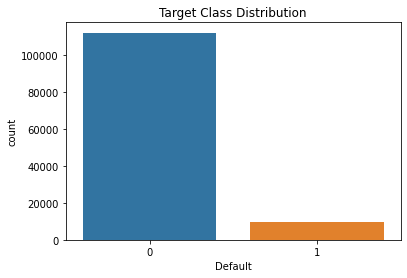

In [7]:
# Plot target distribution
sns.countplot(x=target_column, data=df)
plt.title("Target Class Distribution")
plt.show()

In [8]:
# 3. Missing Values Analysis
missing_df = df.isnull().mean() * 100
missing_df = missing_df[missing_df > 0].sort_values(ascending=False)

print("\nMissing Values Percentage:")
print(missing_df)


Missing Values Percentage:
Own_House_Age                 65.729221
Score_Source_1                56.488806
Social_Circle_Default         50.820641
Client_Occupation             34.003250
Score_Source_3                22.092470
Credit_Bureau                 15.214680
ID_Days                        4.897584
Score_Source_2                 4.666163
Population_Region_Relative     3.985852
Loan_Annuity                   3.948923
Client_Income_Type             3.037191
Client_Housing_Type            3.025702
Phone_Change                   3.006828
Application_Process_Hour       3.006007
House_Own                      3.004366
Loan_Contract_Type             2.996159
Employed_Days                  2.994518
Client_Education               2.991236
Child_Count                    2.985491
Active_Loan                    2.983029
Credit_Amount                  2.980567
Bike_Owned                     2.974002
Registration_Days              2.965796
Type_Organization              2.961692
Client_Incom

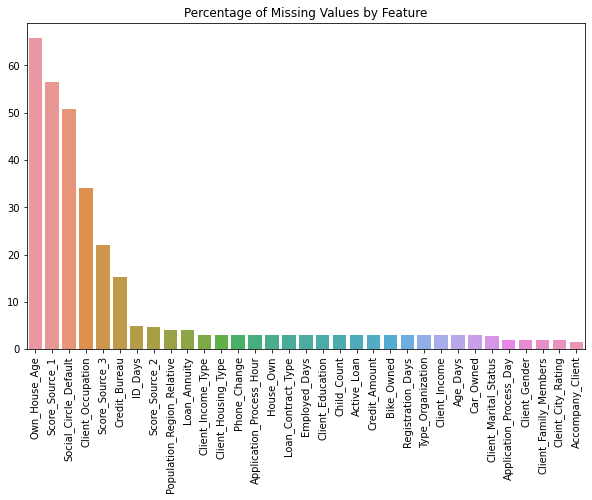

In [28]:
# Plot missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_df.index, y=missing_df)
plt.xticks(rotation=90)
plt.title("Percentage of Missing Values by Feature")
plt.show()

In [29]:
# 4. Feature Distributions
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.difference([target_column])
categorical_features = df.select_dtypes(include=['object', 'category']).columns

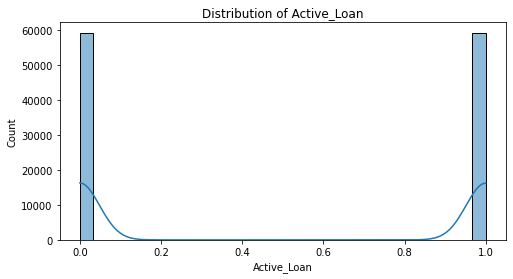

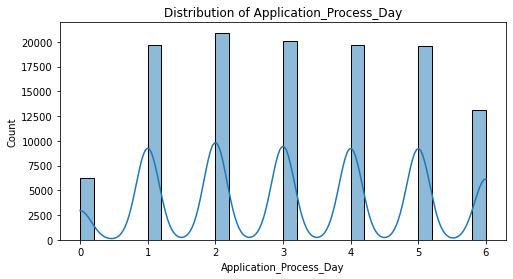

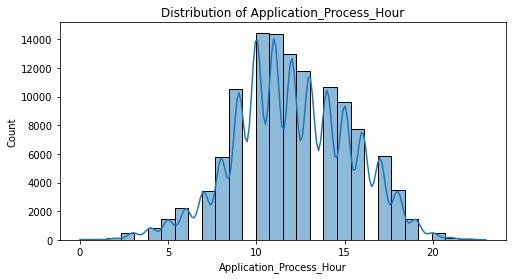

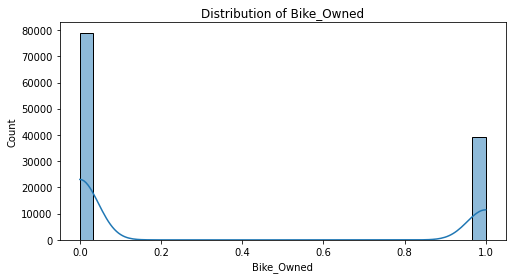

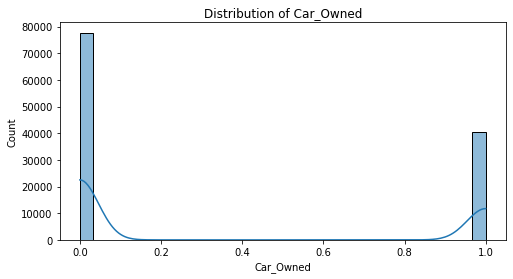

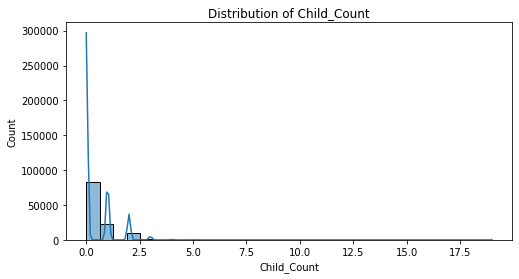

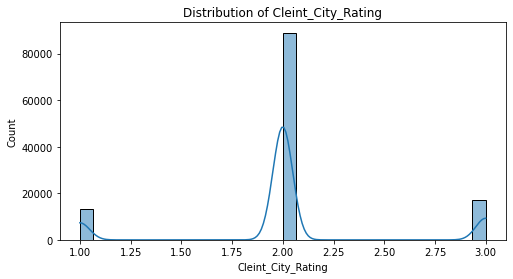

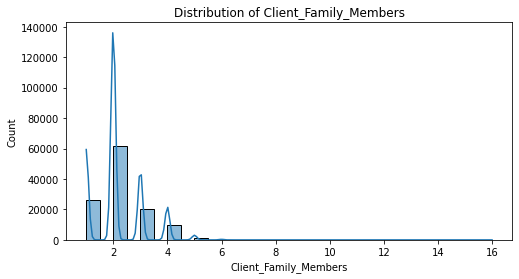

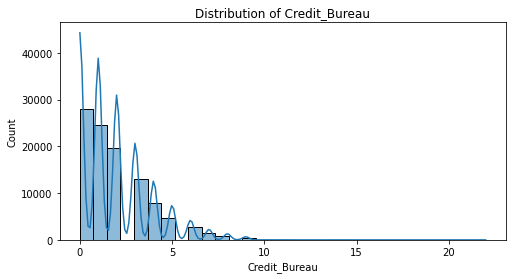

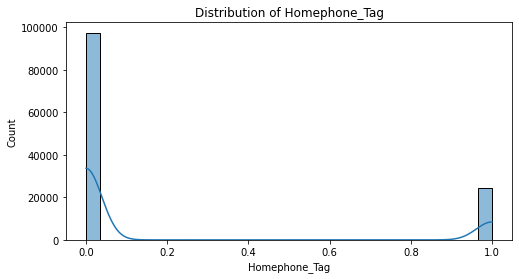

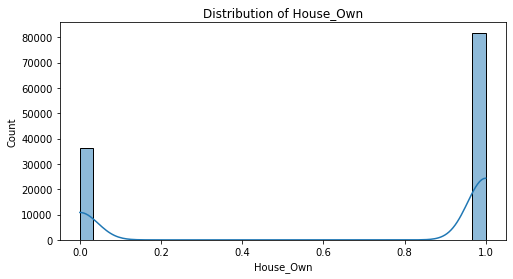

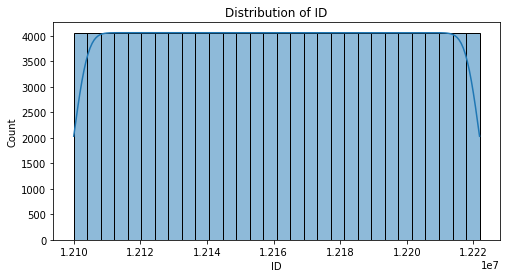

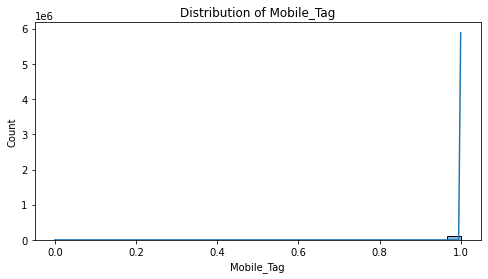

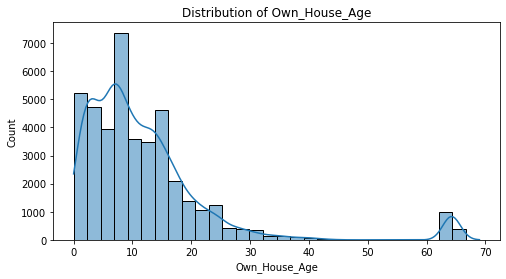

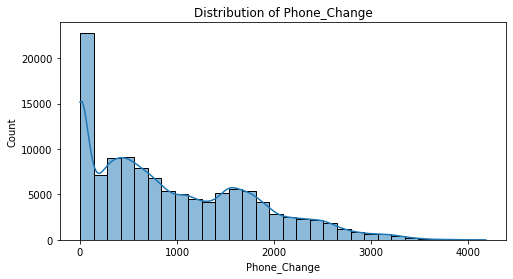

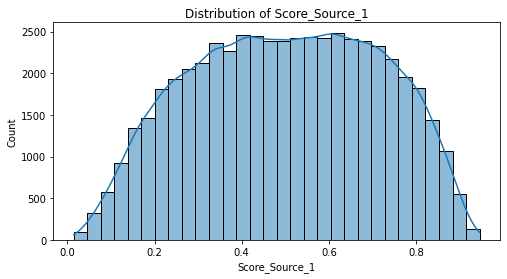

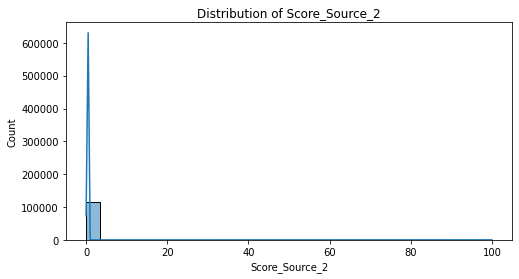

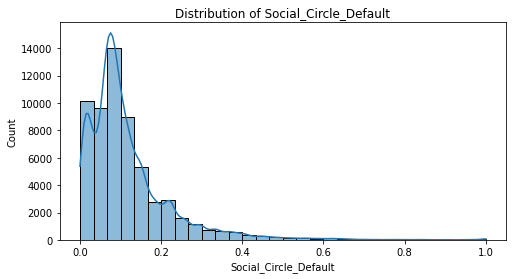

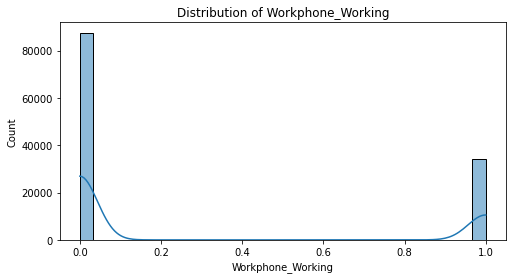

In [30]:
# Plot numerical feature distributions
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()

In [50]:
# 5. Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

NameError: name 'numerical_features' is not defined

<Figure size 864x576 with 0 Axes>

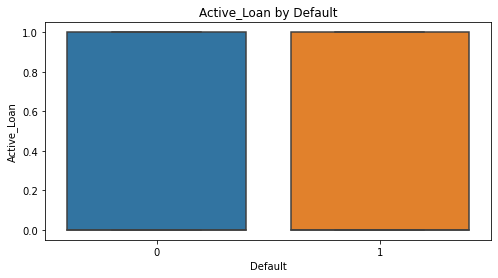

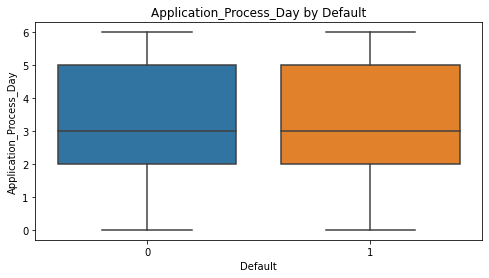

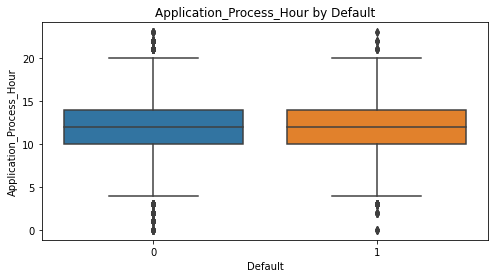

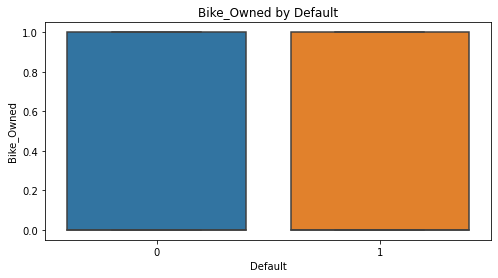

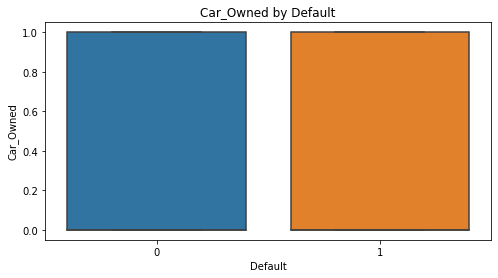

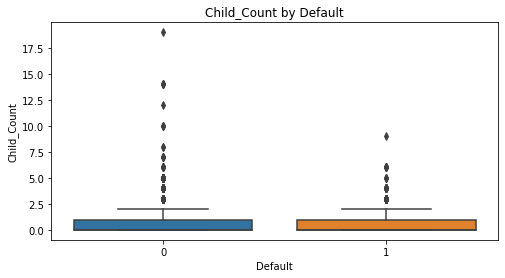

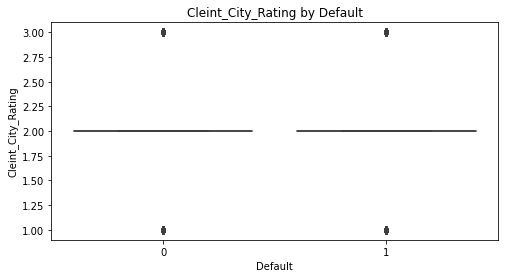

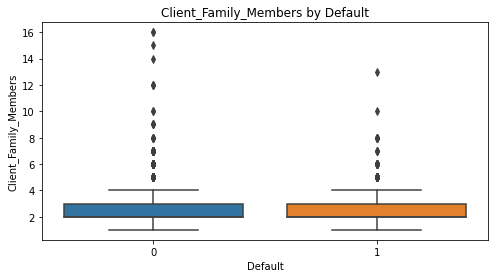

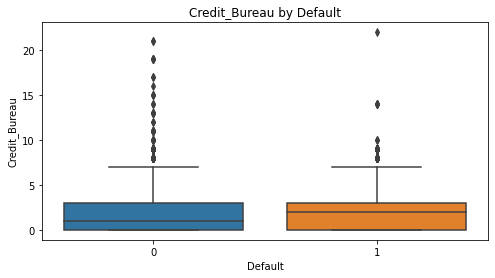

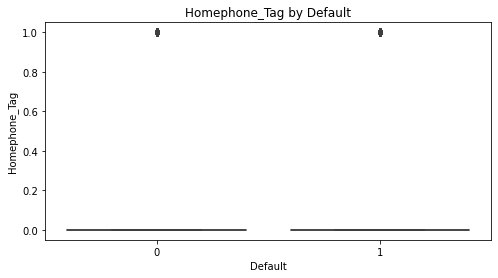

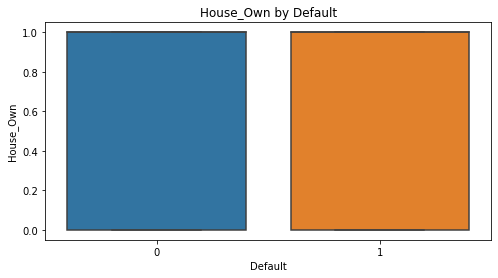

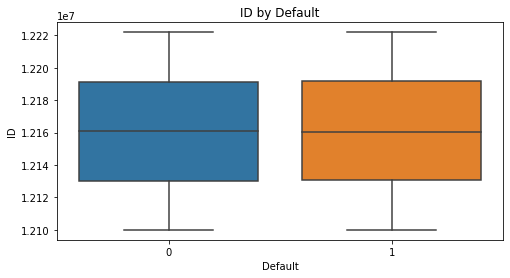

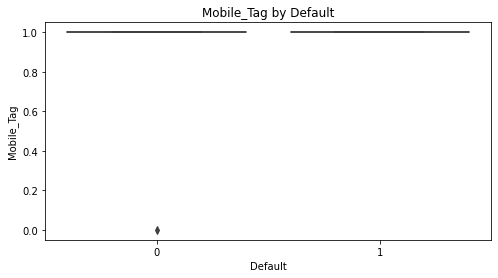

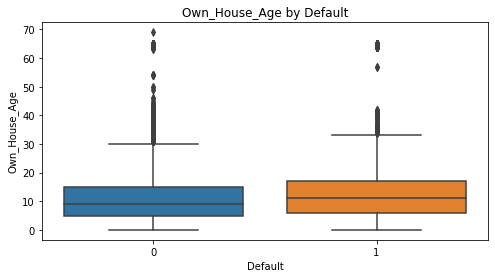

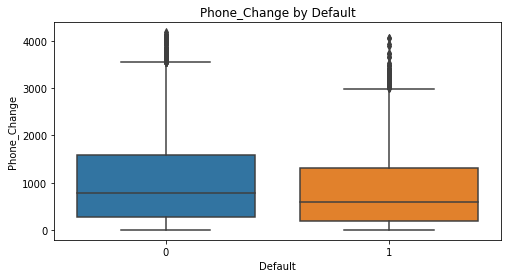

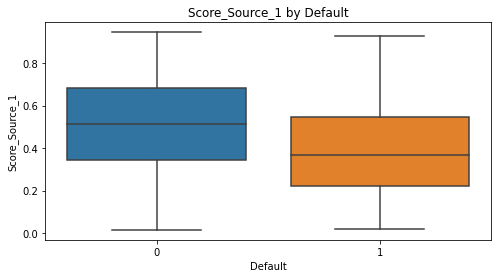

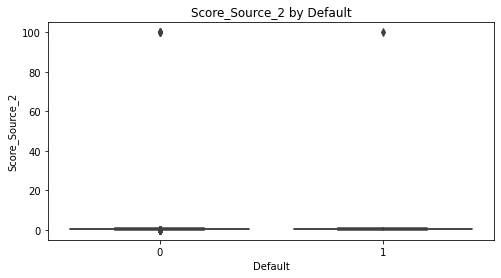

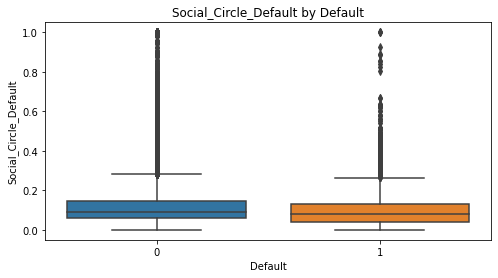

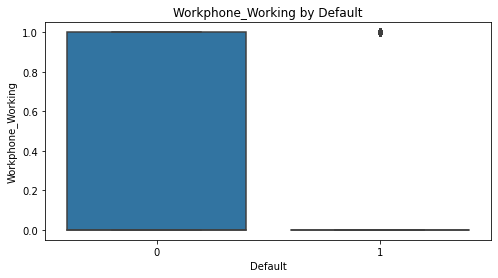

In [33]:
# 6. Feature vs Target Relationships
# Boxplots for numerical features vs target
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=target_column, y=feature, data=df)
    plt.title(f"{feature} by {target_column}")
    plt.show()

In [35]:

# 7. Feature-Target Relationships with Missing Data
for feature in df.columns.difference([target_column]):
    null_percentages = df.groupby(target_column)[feature].apply(lambda x: x.isnull().mean() * 100)
    print(f"Null Percentage for {feature} by Target:")
    print(null_percentages)
    print()

Null Percentage for Accompany_Client by Target:
Default
0    1.448965
1    1.249365
Name: Accompany_Client, dtype: float64

Null Percentage for Active_Loan by Target:
Default
0    2.978279
1    3.037075
Name: Active_Loan, dtype: float64

Null Percentage for Age_Days by Target:
Default
0    2.955067
1    2.945658
Name: Age_Days, dtype: float64

Null Percentage for Application_Process_Day by Target:
Default
0    1.986412
1    2.061960
Name: Application_Process_Day, dtype: float64

Null Percentage for Application_Process_Hour by Target:
Default
0    2.988992
1    3.199594
Name: Application_Process_Hour, dtype: float64

Null Percentage for Bike_Owned by Target:
Default
0    2.938104
1    3.382428
Name: Bike_Owned, dtype: float64

Null Percentage for Car_Owned by Target:
Default
0    2.944354
1    2.874556
Name: Car_Owned, dtype: float64

Null Percentage for Child_Count by Target:
Default
0    2.984528
1    2.996445
Name: Child_Count, dtype: float64

Null Percentage for Cleint_City_Rating b

In [37]:
len(numerical_features)

19

In [46]:
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [51]:
df.Client_Income.dtype

dtype('O')

In [53]:
df.Client_Income.astype(float64)

NameError: name 'float64' is not defined

In [97]:
df['Client_Income'].head(10)

0     6750
1    20250
2    18000
3    15750
4    33750
5    11250
6    15750
7    13500
8    13500
9    12150
Name: Client_Income, dtype: object

In [12]:


# Filter rows with special characters in the column
special_characters_df = df[df['Client_Income'].apply(has_special_character)]

print("Rows with special characters in Client_Income:")
print(special_characters_df['Client_Income'])

Rows with special characters in Client_Income:
37        32480.55
382        23620.5
495        10636.2
522         5906.7
565       39174.75
            ...   
121029      5872.5
121291     23557.5
121396      9764.1
121519     16752.6
121541    12840.75
Name: Client_Income, Length: 16459, dtype: object


In [51]:
# Apply the function to the column
df['Client_Income'] = df['Client_Income'].apply(clean_and_floor)

print("Processed DataFrame:")
print(df['Client_Income'])

Processed DataFrame:
0          6750.0
1         20250.0
2         18000.0
3         15750.0
4         33750.0
           ...   
121851    29250.0
121852    15750.0
121853     8100.0
121854    38250.0
121855     9000.0
Name: Client_Income, Length: 121856, dtype: float64


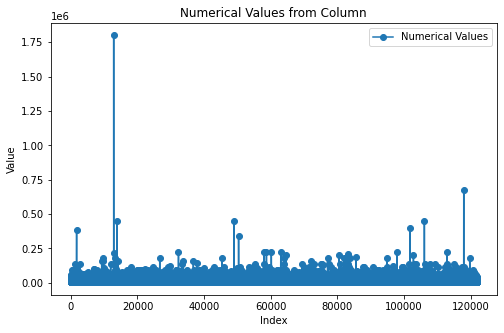

In [111]:
import matplotlib.pyplot as plt

# Drop NaN values
numerical_values = df['Client_Income'].dropna()

# Plot the numerical values
plt.figure(figsize=(8, 5))
plt.plot(numerical_values, marker='o', linestyle='-', label='Numerical Values')
plt.title('Numerical Values from Column')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

In [112]:
print('values of mean and mode : ',numerical_values.mean(),numerical_values.mode())

values of mean and mode :  16865.189031919752 0    13500.0
Name: Client_Income, dtype: float64


In [52]:
## Replacing the null values with mean value 

df['Client_Income'] = df['Client_Income'].fillna(df['Client_Income'].mode().iloc[0])

In [114]:
df['Client_Income'].isna().sum()

0

In [116]:
# Add jitter to the binary target for better visualization
jitter = np.random.uniform(-0.1, 0.1, size=len(df))
df['binary_target_jittered'] = df['Default'] + jitter

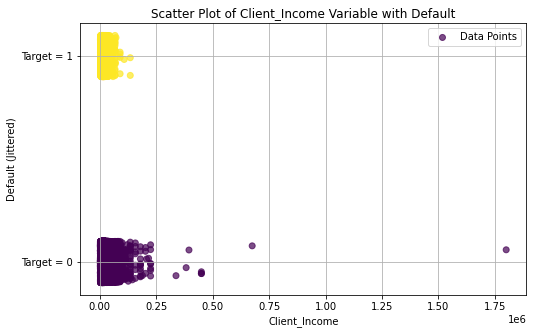

In [117]:
# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['Client_Income'], df['binary_target_jittered'], alpha=0.7, c=df['Default'], cmap='viridis', label='Data Points')
plt.title('Scatter Plot of Client_Income Variable with Default')
plt.xlabel('Client_Income')
plt.ylabel('Default (Jittered)')
plt.yticks([0, 1], labels=['Target = 0', 'Target = 1'])
plt.grid(True)
plt.legend()
plt.show()

In [76]:
df['Client_Income'].max()

1800009.0

{'whiskers': [<matplotlib.lines.Line2D at 0x19bd1015220>,
 'caps': [<matplotlib.lines.Line2D at 0x19bd1015100>,
 'boxes': [<matplotlib.lines.Line2D at 0x19bd10158e0>],
 'medians': [<matplotlib.lines.Line2D at 0x19bd0fca700>],
 'fliers': [<matplotlib.lines.Line2D at 0x19bd0fca490>],
 'means': []}

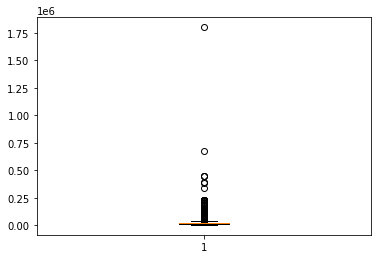

In [79]:
plt.boxplot(df['Client_Income'])

In [83]:
mean_val=df['Client_Income'].mean()

In [94]:
(df['Client_Income'].where(df['Client_Income'] < mean_val)).count()

71944

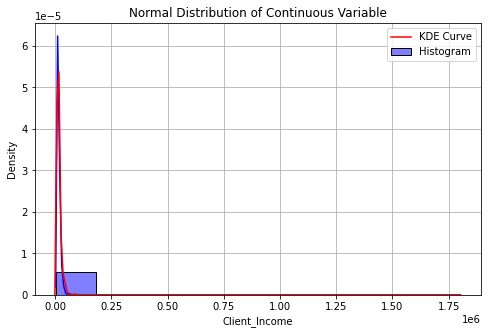

In [95]:
# Plotting the normal distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Client_Income'], kde=True, bins=10, color='blue', stat="density", label='Histogram')
sns.kdeplot(df['Client_Income'], color='red', label='KDE Curve')
plt.title('Normal Distribution of Continuous Variable')
plt.xlabel('Client_Income')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# Calculate Q1, Q3, and IQR
Q1 = df['Client_Income'].quantile(0.25)
Q3 = df['Client_Income'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Clip values outside the bounds
df['Client_Income_clipped'] = df['Client_Income'].clip(upper=upper_bound)



In [54]:
df['Client_Income_clipped']

0          6750.0
1         20250.0
2         18000.0
3         15750.0
4         33750.0
           ...   
121851    29250.0
121852    15750.0
121853     8100.0
121854    38250.0
121855     9000.0
Name: Client_Income_clipped, Length: 121856, dtype: float64

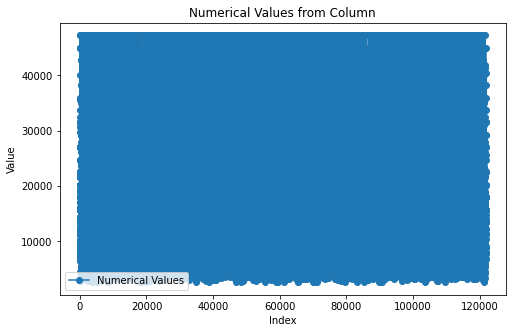

In [120]:
numerical_values = df['Client_Income_clipped']

# Plot the numerical values
plt.figure(figsize=(8, 5))
plt.plot(numerical_values, marker='o', linestyle='-', label='Numerical Values')
plt.title('Numerical Values from Column')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

In [127]:
df['Credit_Amount'].dtype

dtype('float64')

In [55]:
# Apply the function to the column
df['Credit_Amount'] = df['Credit_Amount'].apply(clean_and_floor)

print("Processed DataFrame:")
print(df['Credit_Amount'])

Processed DataFrame:
0          61190.0
1          15282.0
2          59527.0
3          53870.0
4         133988.0
            ...   
121851    107820.0
121852    104256.0
121853     55107.0
121854     45000.0
121855     62428.0
Name: Credit_Amount, Length: 121856, dtype: float64


In [129]:
df['Credit_Amount'].isna().sum()

3637

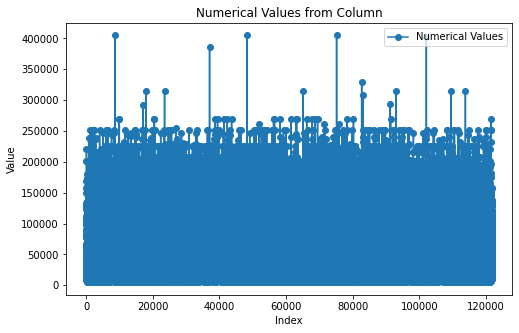

In [130]:
numerical_values = df['Credit_Amount'].dropna()

# Plot the numerical values
plt.figure(figsize=(8, 5))
plt.plot(numerical_values, marker='o', linestyle='-', label='Numerical Values')
plt.title('Numerical Values from Column')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

{'whiskers': [<matplotlib.lines.Line2D at 0x19bcc562130>,
 'caps': [<matplotlib.lines.Line2D at 0x19bc894d820>,
 'boxes': [<matplotlib.lines.Line2D at 0x19bd10608e0>],
 'medians': [<matplotlib.lines.Line2D at 0x19bc832aa00>],
 'fliers': [<matplotlib.lines.Line2D at 0x19bc19ab370>],
 'means': []}

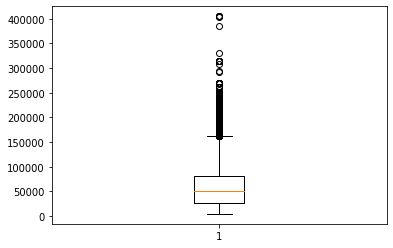

In [131]:
plt.boxplot(numerical_values)

In [ ]:
## Replacing the null values with mode value because outliers 

df['Client_Income'] = df['Client_Income'].fillna(df['Client_Income'].mode().iloc[0])

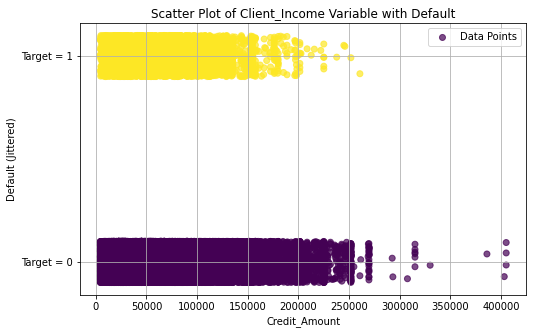

In [132]:
# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['Credit_Amount'], df['binary_target_jittered'], alpha=0.7, c=df['Default'], cmap='viridis', label='Data Points')
plt.title('Scatter Plot of Client_Income Variable with Default')
plt.xlabel('Credit_Amount')
plt.ylabel('Default (Jittered)')
plt.yticks([0, 1], labels=['Target = 0', 'Target = 1'])
plt.grid(True)
plt.legend()
plt.show()

In [133]:
# Calculate Q1, Q3, and IQR
Q1 = df['Credit_Amount'].quantile(0.25)
Q3 = df['Credit_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Clip values outside the bounds
df['Credit_Amount_clipped'] = df['Credit_Amount'].clip(upper=upper_bound)

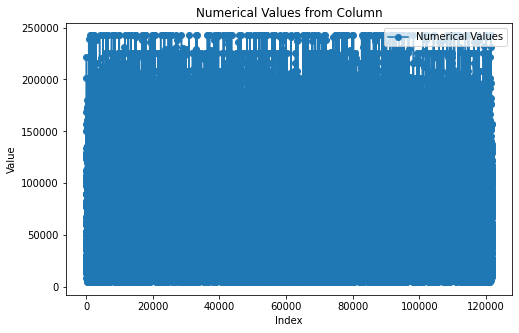

In [134]:
numerical_values = df['Credit_Amount_clipped']

# Plot the numerical values
plt.figure(figsize=(8, 5))
plt.plot(numerical_values, marker='o', linestyle='-', label='Numerical Values')
plt.title('Numerical Values from Column')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

In [136]:
df['Loan_Annuity'].isna().sum()

4812

In [138]:
df['Loan_Annuity']

0         3416.85
1         1826.55
2          2788.2
3         2295.45
4         3547.35
           ...   
121851     3165.3
121852    3388.05
121853    2989.35
121854    2719.35
121855    4201.65
Name: Loan_Annuity, Length: 121856, dtype: object

In [56]:
# Apply the function to the column
df['Loan_Annuity'] = df['Loan_Annuity'].apply(clean_and_floor)

print("Processed DataFrame:")
print(df['Loan_Annuity'])

Processed DataFrame:
0         3416.0
1         1826.0
2         2788.0
3         2295.0
4         3547.0
           ...  
121851    3165.0
121852    3388.0
121853    2989.0
121854    2719.0
121855    4201.0
Name: Loan_Annuity, Length: 121856, dtype: float64


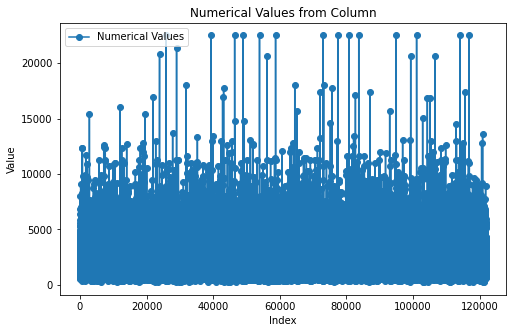

In [16]:
numerical_values = df['Loan_Annuity'].dropna()

# Plot the numerical values
plt.figure(figsize=(8, 5))
plt.plot(numerical_values, marker='o', linestyle='-', label='Numerical Values')
plt.title('Numerical Values from Column')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

{'whiskers': [<matplotlib.lines.Line2D at 0x19bd129c160>,
 'caps': [<matplotlib.lines.Line2D at 0x19bd129c580>,
 'boxes': [<matplotlib.lines.Line2D at 0x19bd129c280>],
 'medians': [<matplotlib.lines.Line2D at 0x19be3ce42e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19be3ce4cd0>],
 'means': []}

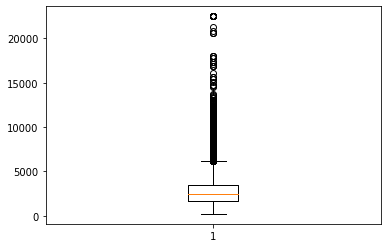

In [141]:
plt.boxplot(numerical_values)

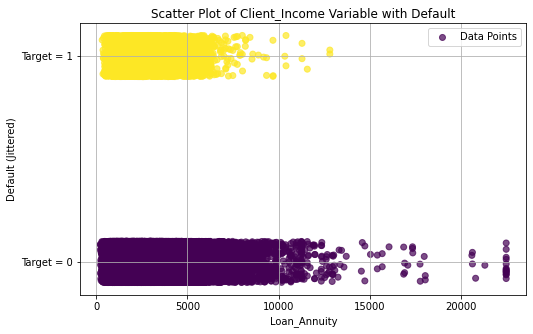

In [142]:
# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['Loan_Annuity'], df['binary_target_jittered'], alpha=0.7, c=df['Default'], cmap='viridis', label='Data Points')
plt.title('Scatter Plot of Client_Income Variable with Default')
plt.xlabel('Loan_Annuity')
plt.ylabel('Default (Jittered)')
plt.yticks([0, 1], labels=['Target = 0', 'Target = 1'])
plt.grid(True)
plt.legend()
plt.show()

In [57]:
# Calculate Q1, Q3, and IQR
Q1 = df['Loan_Annuity'].quantile(0.25)
Q3 = df['Loan_Annuity'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Clip values outside the bounds
df['Loan_Annuity_clipped'] = df['Loan_Annuity'].clip(upper=upper_bound)

In [18]:
df['Loan_Annuity_clipped']

0         3416.0
1         1826.0
2         2788.0
3         2295.0
4         3547.0
           ...  
121851    3165.0
121852    3388.0
121853    2989.0
121854    2719.0
121855    4201.0
Name: Loan_Annuity_clipped, Length: 121856, dtype: float64

In [21]:
df['Child_Count'].isna().sum()

3638

In [58]:
df['Client_Family_Members'].isna().sum()

2410

In [59]:
# Filter rows where Client_Family_Members is null and Child_Count has values
condition_1 = df[df['Client_Family_Members'].isnull() & df['Child_Count'].notnull()]

# Filter rows where Child_Count is null and Client_Family_Members has values
condition_2 = df[df['Child_Count'].isnull() & df['Client_Family_Members'].notnull()]

print("Rows where Client_Family_Members is null and Child_Count has values:")
print(condition_1)
print(condition_1.shape)

#print("\nRows where Child_Count is null and Client_Family_Members has values:")
#print(condition_2)

Rows where Client_Family_Members is null and Child_Count has values:
              ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  \
35      12184202        18000.0        0.0         1.0          0.0   
60      12113801        21600.0        0.0         0.0          0.0   
78      12181435        13500.0        1.0         1.0          1.0   
96      12165536         9000.0        0.0         0.0          1.0   
148     12184221        11250.0        0.0         1.0          0.0   
...          ...            ...        ...         ...          ...   
121767  12154727        20250.0        0.0         0.0          1.0   
121770  12186045        15750.0        0.0         0.0          0.0   
121819  12184641        18000.0        0.0         1.0          1.0   
121843  12182154        27000.0        0.0         0.0          0.0   
121847  12186941        15750.0        1.0         0.0          1.0   

        House_Own  Child_Count  Credit_Amount  Loan_Annuity Accompany_Client  

In [35]:
# Filter rows where Client_Family_Members is null and Child_Count has values
condition_3 = df[df['Client_Family_Members'] <  df['Child_Count']]

In [36]:
condition_3

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default,Loan_Annuity_clipped


In [60]:
# Replace null values in Client_Family_Members based on Client_Marital_Status
df['Client_Family_Members'] = df['Client_Family_Members'].fillna(
    df.apply(
        lambda row: row['Child_Count'] + 1 if row['Client_Marital_Status'] == 'M'
        else row['Child_Count'] if row['Client_Marital_Status'] in ['S', 'D', 'W']
        else np.nan,
        axis=1
    )
)

In [64]:
df['Client_Family_Members'].isna().sum()

67

In [63]:
# Replace null values in Client_Family_Members with Child_Count + 1
df['Client_Family_Members'] = df['Client_Family_Members'].fillna(df['Child_Count'] + 1)


In [62]:
# Filter rows where Client_Family_Members is null
filtered_df = df[df['Client_Family_Members'].isnull()]

# Check the distribution of the 'default' column
default_distribution = filtered_df['Default'].value_counts(normalize=True)

print("Distribution of 'default' where Client_Family_Members is null:")
print(default_distribution)

Distribution of 'default' where Client_Family_Members is null:
Default
0    0.910714
1    0.089286
Name: proportion, dtype: float64


In [41]:
# Filter rows where Client_Family_Members is null and select Client_Marital_Status
marital_status_null_family = df.loc[df['Client_Family_Members'].isnull(), 'Client_Marital_Status']

print("Client_Marital_Status where Client_Family_Members is null:")
print(marital_status_null_family)

Client_Marital_Status where Client_Family_Members is null:
611         S
803       NaN
4232        M
4484        D
9325        M
         ... 
116735      M
117741      M
118233      M
119600      S
121329      M
Name: Client_Marital_Status, Length: 67, dtype: object


In [42]:
df['Client_Family_Members'].min()

1.0

In [43]:
df['Client_Marital_Status'].value_counts()

Client_Marital_Status
M    87349
S    17404
D     7556
W     6074
Name: count, dtype: int64

In [65]:
# Fill NaN values in Client_Family_Members based on Client_Marital_Status
df['Client_Family_Members'] = df['Client_Family_Members'].fillna(
    df['Client_Marital_Status'].map({'M': 1, 'S': 0, 'D': 0, 'W': 0})
)

In [68]:
df['Client_Family_Members'].isna().sum()

0

In [67]:
df['Client_Family_Members'] = df['Client_Family_Members'].fillna(0)

In [72]:
df.Client_Marital_Status.value_counts()

Client_Marital_Status
M    87349
S    17404
D     7556
W     6074
Name: count, dtype: int64

In [75]:
df.Age_Days.isna().sum()

3600

In [82]:
# Apply the function to the column
df['Age_Days'] = df['Age_Days'].apply(clean_and_floor)

print("Processed DataFrame:")
print(df['Age_Days'])



Processed DataFrame:
0         13957.0
1         14162.0
2         16790.0
3         23195.0
4         11366.0
           ...   
121851    12889.0
121852     8648.0
121853     9152.0
121854    10290.0
121855    14772.0
Name: Age_Days, Length: 121856, dtype: float64


In [84]:
# Apply the function to the column
df['Employed_Days'] = df['Employed_Days'].apply(clean_and_floor)

print("Processed DataFrame:")
print(df['Employed_Days'])

Processed DataFrame:
0           1062.0
1           4129.0
2           5102.0
3         365243.0
4           2977.0
            ...   
121851      2863.0
121852       636.0
121853      1623.0
121854       847.0
121855       498.0
Name: Employed_Days, Length: 121856, dtype: float64


In [85]:
# Replace the value 365243 in the Employed_Days column
df['Employed_Days'] = df['Employed_Days'].replace(365243, 0)  # Replace with 0


In [86]:
# Filter rows where Client_Family_Members is null and Child_Count has values
condition_1 = df[df['Age_Days'].isnull() & df['Employed_Days'].notnull()]


print("Shape where Age_Days is null and Employed_Days has values:")
print(condition_1.shape)

Shape where Age_Days is null and Employed_Days has values:
(3493, 42)


In [87]:
df1 = pd.DataFrame(condition_1)

In [88]:
df1['Employed_Days']

8          7889.0
19         2504.0
43         2026.0
44            0.0
53         2758.0
           ...   
121709    10823.0
121715     3359.0
121732     2757.0
121749      766.0
121761     1696.0
Name: Employed_Days, Length: 3493, dtype: float64

In [90]:
# Impute Age_Days where the conditions are met
df['Age_Days'] = df.apply(
    lambda row: row['Employed_Days'] + 6570 if pd.isnull(row['Age_Days']) and row['Employed_Days'] > 0 else row['Age_Days'],
    axis=1
)

In [96]:
df['Age_Days'].isna().sum()

0

In [95]:
df['Age_Days']= df['Age_Days'].fillna(6570)

In [97]:
df['Car_Owned'].isna().sum()

3581

In [98]:
df['Bike_Owned'].isna().sum()

3624

In [99]:
df['Active_Loan'].isna().sum()

3635

In [102]:
# Filling null values with 0 assuming no such loan exists for the customer

df['Car_Owned'] = df['Car_Owned'].fillna(0)
df['Bike_Owned'] = df['Bike_Owned'].fillna(0)
df['Active_Loan'] = df['Active_Loan'].fillna(0)

# Changing the data type to int

df['Car_Owned'] = df['Car_Owned'].astype(int)
df['Bike_Owned'] = df['Bike_Owned'].astype(int)
df['Active_Loan'] = df['Active_Loan'].astype(int)

In [103]:
print(df['Active_Loan'].isna().sum(),df['Bike_Owned'].isna().sum(),df['Car_Owned'].isna().sum())

0 0 0


In [104]:
df['House_Own'].isna().sum()

3661

In [105]:
df['House_Own'].value_counts()

House_Own
1.0    81798
0.0    36397
Name: count, dtype: int64

In [108]:
df['Own_House_Age'].isna().sum()

80095

In [106]:
df_exp = df[df['House_Own'].isna() & df['Own_House_Age'].notnull()]
df_exp['Own_House_Age']

1          0.0
129       13.0
153        4.0
186        6.0
199        9.0
          ... 
121298     1.0
121482    11.0
121589    65.0
121656    64.0
121799     2.0
Name: Own_House_Age, Length: 1282, dtype: float64

In [109]:
# Fill null values in House_Own with 1 where Own_House_Age is not null
df['House_Own'] = df['House_Own'].fillna(df['Own_House_Age'].notnull().astype(int))


In [110]:
df['House_Own'].isna().sum()

0

In [112]:
df['House_Own'].value_counts()

House_Own
1.0    83080
0.0    38776
Name: count, dtype: int64

In [113]:
print(df['Mobile_Tag'].isna().sum(),df['Homephone_Tag'].isna().sum(),df['Workphone_Working'].isna().sum())

0 0 0


In [115]:
df['Accompany_Client'].value_counts()

Accompany_Client
Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
##             12
Name: count, dtype: int64

In [116]:
df['Accompany_Client'].isna().sum()

1746

In [122]:
df_exp = df.copy()

In [123]:
# Replace None with 'Missing' for visualization
df_exp['Accompany_Client'] = df_exp['Accompany_Client'].fillna('Missing')

In [121]:
data

0            Alone
1            Alone
2            Alone
3            Alone
4            Alone
            ...   
121851    Relative
121852       Alone
121853       Alone
121854       Alone
121855       Alone
Name: Accompany_Client, Length: 121856, dtype: object

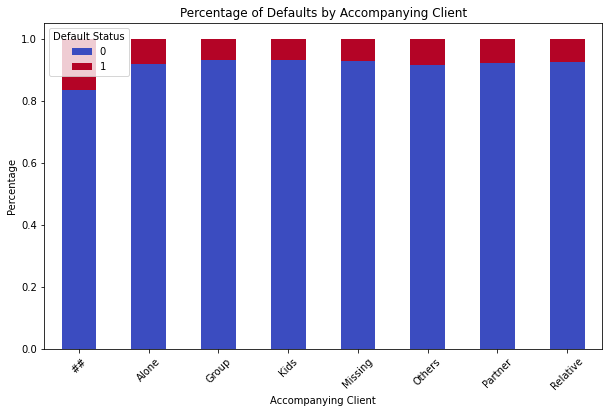

In [125]:
# Calculate percentages
percentages = df_exp.groupby('Accompany_Client')['Default'].value_counts(normalize=True).rename('percentage').reset_index()

# Pivot for stacked bar chart
pivot_data = percentages.pivot(index='Accompany_Client', columns='Default', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

plt.title('Percentage of Defaults by Accompanying Client')
plt.xlabel('Accompanying Client')
plt.ylabel('Percentage')
plt.legend(title='Default Status')
plt.xticks(rotation=45)
plt.show()

In [126]:
# Replace missing values and "##" with "Others"
df['Accompany_Client'] = df['Accompany_Client'].replace({np.nan: 'Others', '##': 'Others'})

In [130]:
df['Accompany_Client'].value_counts()

Accompany_Client
Alone       97409
Relative    15748
Partner      4516
Others       2745
Kids         1334
Group         104
Name: count, dtype: int64

In [131]:
df['Client_Income_Type'].isna().sum()

3701

In [132]:
df['Client_Income_Type'].value_counts()

Client_Income_Type
Service            61028
Commercial         27764
Retired            21043
Govt Job            8303
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: count, dtype: int64

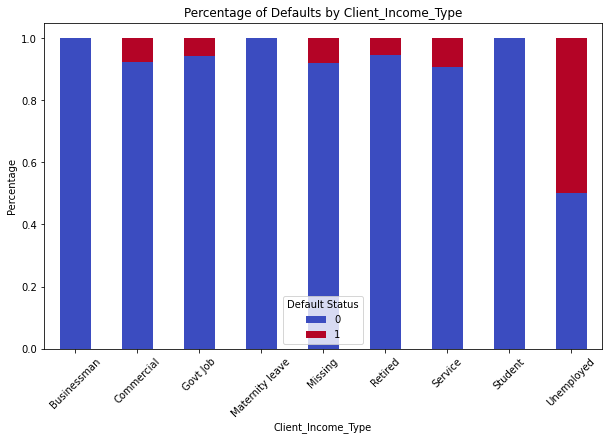

In [133]:
# Replace None with 'Missing' for visualization
df_exp['Client_Income_Type'] = df_exp['Client_Income_Type'].fillna('Missing')

# Calculate percentages
percentages = df_exp.groupby('Client_Income_Type')['Default'].value_counts(normalize=True).rename('percentage').reset_index()

# Pivot for stacked bar chart
pivot_data = percentages.pivot(index='Client_Income_Type', columns='Default', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

plt.title('Percentage of Defaults by Client_Income_Type')
plt.xlabel('Client_Income_Type')
plt.ylabel('Percentage')
plt.legend(title='Default Status')
plt.xticks(rotation=45)
plt.show()


In [139]:
# Replace missing values  "##" with "Others"
df['Client_Income_Type'] = df['Client_Income_Type'].replace({np.nan: 'Govt_job_others', 
                                                         'Student': 'Govt_job_others', 
                                                         'Unemployed': 'Govt_job_others', 
                                                         'Maternity leave': 'Govt_job_others',
                                                         'Businessman': 'Govt_job_others',
                                                            'Govt Job' : 'Govt_job_others'})

In [140]:
df['Client_Income_Type'].value_counts()

Client_Income_Type
Service            61028
Commercial         27764
Retired            21043
Govt_job_others    12021
Name: count, dtype: int64

In [146]:
df['Client_Education'].value_counts()

Client_Education
Secondary             83911
Graduation            28819
Graduation dropout     3960
Others                 3645
Junior secondary       1455
Post Grad                66
Name: count, dtype: int64

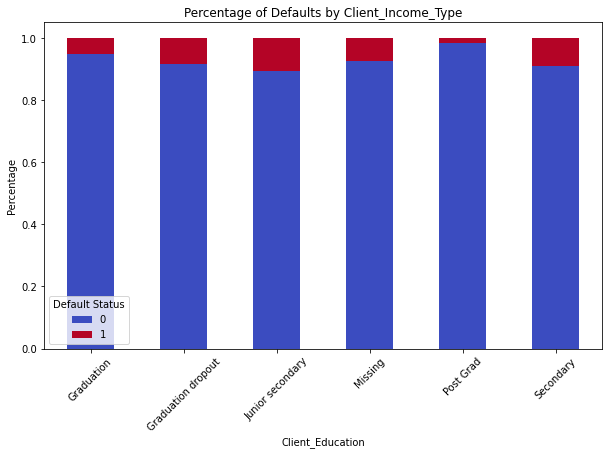

In [143]:

df_exp = df.copy()
# Replace None with 'Missing' for visualization
df_exp['Client_Education'] = df_exp['Client_Education'].fillna('Missing')

# Calculate percentages
percentages = df_exp.groupby('Client_Education')['Default'].value_counts(normalize=True).rename('percentage').reset_index()

# Pivot for stacked bar chart
pivot_data = percentages.pivot(index='Client_Education', columns='Default', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

plt.title('Percentage of Defaults by Client_Income_Type')
plt.xlabel('Client_Education')
plt.ylabel('Percentage')
plt.legend(title='Default Status')
plt.xticks(rotation=45)
plt.show()

In [144]:
df['Client_Education'] = df['Client_Education'].fillna('Others')

In [153]:
df['Client_Marital_Status'].isna().sum()

0

In [154]:
df['Client_Marital_Status'].value_counts()

Client_Marital_Status
M    90822
S    17404
D     7556
W     6074
Name: count, dtype: int64

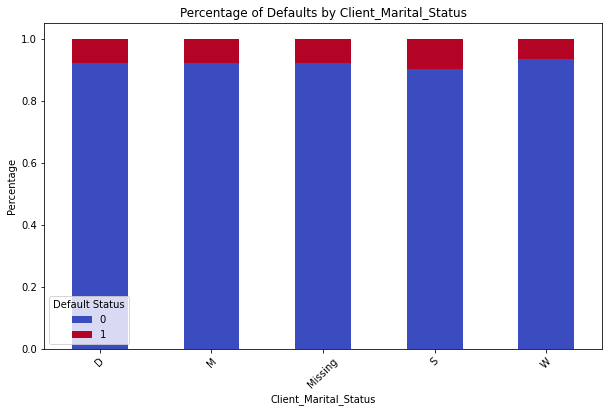

In [149]:
df_exp = df.copy()
# Replace None with 'Missing' for visualization
df_exp['Client_Marital_Status'] = df_exp['Client_Marital_Status'].fillna('Missing')

# Calculate percentages
percentages = df_exp.groupby('Client_Marital_Status')['Default'].value_counts(normalize=True).rename('percentage').reset_index()

# Pivot for stacked bar chart
pivot_data = percentages.pivot(index='Client_Marital_Status', columns='Default', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

plt.title('Percentage of Defaults by Client_Marital_Status')
plt.xlabel('Client_Marital_Status')
plt.ylabel('Percentage')
plt.legend(title='Default Status')
plt.xticks(rotation=45)
plt.show()

In [151]:
df['Client_Marital_Status'].mode()

0    M
Name: Client_Marital_Status, dtype: object

In [152]:
## Replacing the null values with mode 

df['Client_Marital_Status'] = df['Client_Marital_Status'].fillna(df['Client_Marital_Status'].mode().iloc[0])

In [156]:
print(df['Client_Gender'].isna().sum())
df['Client_Gender'].value_counts()

2413


Client_Gender
Male      78463
Female    40977
XNA           3
Name: count, dtype: int64

In [157]:
df=df.drop(columns = 'Client_Gender')

In [158]:
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Own_House_Age', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default', 'Client_Income_clipped',
       'Loan_Annuity_clipped'],
      dtype='object')

In [162]:
print(df['Loan_Contract_Type'].isna().sum())
df['Loan_Contract_Type'].value_counts()

0


Loan_Contract_Type
CL    110769
RL     11087
Name: count, dtype: int64

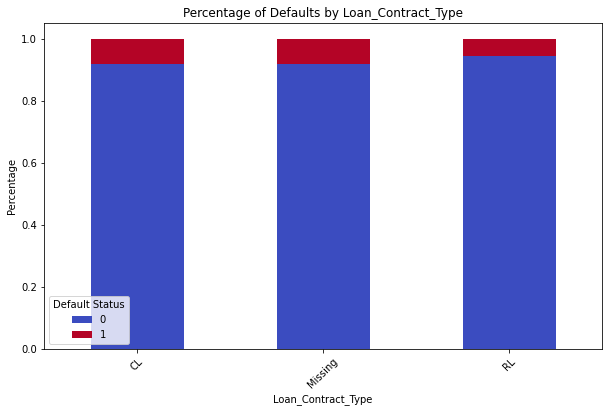

In [160]:
df_exp = df.copy()
# Replace None with 'Missing' for visualization
df_exp['Loan_Contract_Type'] = df_exp['Loan_Contract_Type'].fillna('Missing')

# Calculate percentages
percentages = df_exp.groupby('Loan_Contract_Type')['Default'].value_counts(normalize=True).rename('percentage').reset_index()

# Pivot for stacked bar chart
pivot_data = percentages.pivot(index='Loan_Contract_Type', columns='Default', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

plt.title('Percentage of Defaults by Loan_Contract_Type')
plt.xlabel('Loan_Contract_Type')
plt.ylabel('Percentage')
plt.legend(title='Default Status')
plt.xticks(rotation=45)
plt.show()

In [161]:
## Replacing the null values with mode 

df['Loan_Contract_Type'] = df['Loan_Contract_Type'].fillna(df['Loan_Contract_Type'].mode().iloc[0])

In [167]:
print(df['Client_Housing_Type'].isna().sum())
df['Client_Housing_Type'].value_counts()

0


Client_Housing_Type
Home         108557
Family         5783
Municipal      4248
Rental         1816
Office         1002
Shared          450
Name: count, dtype: int64

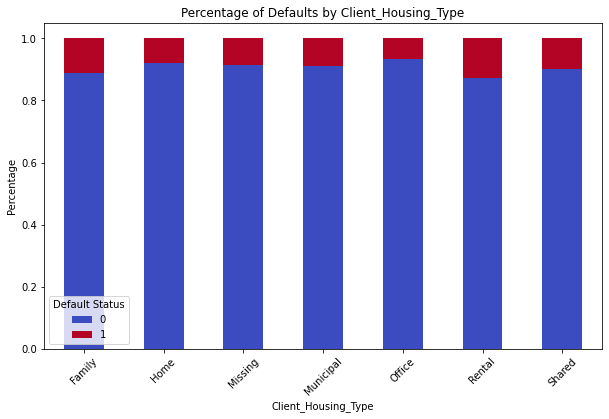

In [164]:
df_exp = df.copy()
# Replace None with 'Missing' for visualization
df_exp['Client_Housing_Type'] = df_exp['Client_Housing_Type'].fillna('Missing')

# Calculate percentages
percentages = df_exp.groupby('Client_Housing_Type')['Default'].value_counts(normalize=True).rename('percentage').reset_index()

# Pivot for stacked bar chart
pivot_data = percentages.pivot(index='Client_Housing_Type', columns='Default', values='percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

plt.title('Percentage of Defaults by Client_Housing_Type')
plt.xlabel('Client_Housing_Type')
plt.ylabel('Percentage')
plt.legend(title='Default Status')
plt.xticks(rotation=45)
plt.show()

In [166]:
## Replacing the null values with mode 

df['Client_Housing_Type'] = df['Client_Housing_Type'].fillna(df['Client_Housing_Type'].mode().iloc[0])

In [173]:
print(df['Population_Region_Relative'].isna().sum())
df['Population_Region_Relative'].value_counts()

83492


Population_Region_Relative
0.035792    2108
0.04622     1673
0.030755    1523
0.025164    1499
0.031329    1429
            ... 
0.001333      23
0.000533       6
0.000938       3
100.0          1
100            1
Name: count, Length: 82, dtype: int64

In [169]:
df['Population_Region_Relative'].head(10)

0    0.028663
1    0.008575
2      0.0228
3    0.010556
4    0.020713
5    0.019101
6    0.016612
7    0.009175
8    0.006008
9    0.016612
Name: Population_Region_Relative, dtype: object

In [171]:
# Replace special characters with NaN
df['Population_Region_Relative'] = df['Population_Region_Relative'].replace(r'[^\w\s]', np.nan, regex=True)

In [181]:
print(df['Population_Region_Relative'].isna().sum())
df['Population_Region_Relative'].value_counts()

83492


Population_Region_Relative
0.035792    2108
0.04622     1673
0.030755    1523
0.025164    1499
0.031329    1429
            ... 
0.001333      23
0.000533       6
0.000938       3
100.0          1
100            1
Name: count, Length: 82, dtype: int64

In [182]:
df = df.drop(columns='Population_Region_Relative')

In [183]:
df

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default,Client_Income_clipped,Loan_Annuity_clipped
0,12142509,6750.0,0,0,1,0.0,0.0,61190.0,3416.0,Alone,...,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0,6750.0,3416.0
1,12138936,20250.0,1,0,1,1.0,0.0,15282.0,1826.0,Alone,...,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0,20250.0,1826.0
2,12181264,18000.0,0,0,1,0.0,1.0,59527.0,2788.0,Alone,...,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0,18000.0,2788.0
3,12188929,15750.0,0,0,1,1.0,0.0,53870.0,2295.0,Alone,...,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0,15750.0,2295.0
4,12133385,33750.0,1,0,1,0.0,2.0,133988.0,3547.0,Alone,...,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0,33750.0,3547.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250.0,0,0,0,1.0,0.0,107820.0,3165.0,Relative,...,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1,29250.0,3165.0
121852,12173765,15750.0,0,1,1,0.0,0.0,104256.0,3388.0,Alone,...,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0,15750.0,3388.0
121853,12103937,8100.0,0,1,0,1.0,1.0,55107.0,2989.0,Alone,...,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0,8100.0,2989.0
121854,12170623,38250.0,1,1,0,1.0,0.0,45000.0,2719.0,Alone,...,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0,38250.0,2719.0


In [187]:
print(df['Registration_Days'].isna().sum())
print(df['Registration_Days'].value_counts())
print('Max Days : ', df['Registration_Days'].max(), ' Min Days : ',df['Registration_Days'].min())

3614
Registration_Days
1          44
9          37
6          36
4          36
973        33
           ..
17619       1
16057.0     1
3581.0      1
5842.0      1
895.0       1
Name: count, Length: 19254, dtype: int64


TypeError: '>=' not supported between instances of 'str' and 'float'

In [188]:
print(df['ID_Days'].isna().sum())
print(df['ID_Days'].value_counts())
print('Max Days : ', df['ID_Days'].max(), ' Min Days : ',df['ID_Days'].min())

5968
ID_Days
4053      73
4375      71
4032      70
4312      67
4144      66
          ..
1244.0     1
1090.0     1
1563.0     1
2009.0     1
5025.0     1
Name: count, Length: 9655, dtype: int64


TypeError: '>=' not supported between instances of 'str' and 'float'

In [193]:
# Convert Registration_Days to numeric, coercing errors to NaN
df['Registration_Days'] = pd.to_numeric(df['Registration_Days'], errors='coerce')

# Convert ID_Days to numeric, coercing errors to NaN
df['ID_Days'] = pd.to_numeric(df['ID_Days'], errors='coerce')



In [194]:
print(df['Registration_Days'].isna().sum())
print(df['Registration_Days'].value_counts())
print('Max Days : ', df['Registration_Days'].max(), ' Min Days : ',df['Registration_Days'].min())

3631
Registration_Days
1.0        45
9.0        38
6.0        38
4.0        38
2.0        36
           ..
14096.0     1
14709.0     1
14744.0     1
12860.0     1
13693.0     1
Name: count, Length: 14142, dtype: int64
Max Days :  23738.0  Min Days :  0.0


In [195]:
print(df['ID_Days'].isna().sum())
print(df['ID_Days'].value_counts())
print('Max Days : ', df['ID_Days'].max(), ' Min Days : ',df['ID_Days'].min())

5985
ID_Days
4053.0    76
4032.0    74
4375.0    73
4312.0    70
4144.0    69
          ..
6176.0     1
6092.0     1
6044.0     1
5764.0     1
6101.0     1
Name: count, Length: 5962, dtype: int64
Max Days :  7197.0  Min Days :  0.0


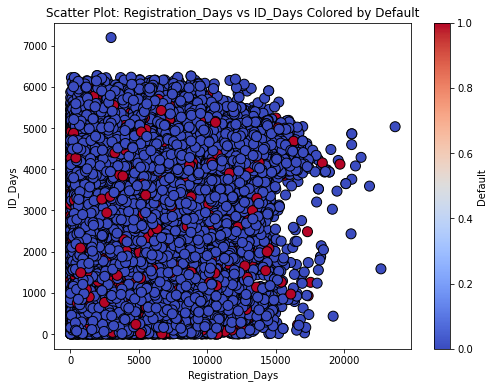

In [196]:
# Remove rows with null values in Registration_Days and ID_Days
df_cleaned = df.dropna(subset=['Registration_Days', 'ID_Days'])

# Scatter plot visualization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_cleaned['Registration_Days'],
    df_cleaned['ID_Days'],
    c=df_cleaned['Default'],
    cmap='coolwarm',  # Colormap for the target variable
    edgecolor='k',
    s=100  # Marker size
)

# Add labels, title, and colorbar
plt.xlabel('Registration_Days')
plt.ylabel('ID_Days')
plt.title('Scatter Plot: Registration_Days vs ID_Days Colored by Default')
plt.colorbar(scatter, label='Default')  # Add a colorbar for the target variable

# Display the plot
plt.show()

In [197]:
## Replacing the null values with mode 

df['Registration_Days'] = df['Registration_Days'].fillna(df['Registration_Days'].mode().iloc[0])

df['ID_Days'] = df['ID_Days'].fillna(df['ID_Days'].mode().iloc[0])

In [198]:
print(df['Registration_Days'].isna().sum())
print(df['ID_Days'].isna().sum())

0
0


In [201]:
print(df['Employed_Days'].isna().sum())
print(df['Employed_Days'].value_counts())
print('Max Days : ', df['Employed_Days'].max(), ' Min Days : ',df['Employed_Days'].min())

0
Employed_Days
0.0        24766
381.0         69
212.0         66
230.0         64
231.0         61
           ...  
13323.0        1
10294.0        1
11616.0        1
9727.0         1
11796.0        1
Name: count, Length: 9948, dtype: int64
Max Days :  17546.0  Min Days :  0.0


In [200]:
df['Employed_Days'] = df['Employed_Days'].fillna(df['Employed_Days'].mode().iloc[0])

In [203]:
print(df['Own_House_Age'].isna().sum())
print(df['Own_House_Age'].value_counts())
print('Max Years : ', df['Own_House_Age'].max(), ' Min Years : ',df['Own_House_Age'].min())

80095
Own_House_Age
7.0     3015
3.0     2555
6.0     2525
2.0     2321
8.0     2302
4.0     2175
9.0     2053
1.0     2041
10.0    1945
14.0    1855
13.0    1800
12.0    1692
11.0    1644
5.0     1433
15.0    1415
16.0    1347
17.0    1193
64.0     974
18.0     919
0.0      859
19.0     740
20.0     644
21.0     591
22.0     490
24.0     457
23.0     420
65.0     392
25.0     353
26.0     225
28.0     221
27.0     182
29.0     156
30.0     129
31.0     121
32.0      87
35.0      75
33.0      68
34.0      67
36.0      57
39.0      40
38.0      37
40.0      37
37.0      32
41.0      30
42.0      13
43.0      10
44.0       8
54.0       5
63.0       2
50.0       2
57.0       2
46.0       2
45.0       1
49.0       1
69.0       1
Name: count, dtype: int64
Max Years :  69.0  Min Years :  0.0


In [205]:
# Remove rows with null values in Registration_Days and ID_Days
df_cleaned = df.copy()

In [206]:
df_cleaned['Own_House_Age'] = df_cleaned['Own_House_Age'].fillna(-1)

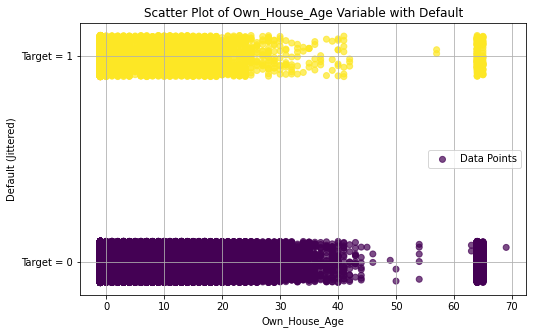

In [207]:
# Add jitter to the binary target for better visualization
jitter = np.random.uniform(-0.1, 0.1, size=len(df))
df_cleaned['binary_target_jittered'] = df_cleaned['Default'] + jitter

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df_cleaned['Own_House_Age'], df_cleaned['binary_target_jittered'], alpha=0.7, c=df_cleaned['Default'], cmap='viridis', label='Data Points')
plt.title('Scatter Plot of Own_House_Age Variable with Default')
plt.xlabel('Own_House_Age')
plt.ylabel('Default (Jittered)')
plt.yticks([0, 1], labels=['Target = 0', 'Target = 1'])
plt.grid(True)
plt.legend()
plt.show()



C:\Users\biswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Own_House_Age', ylabel='count'>

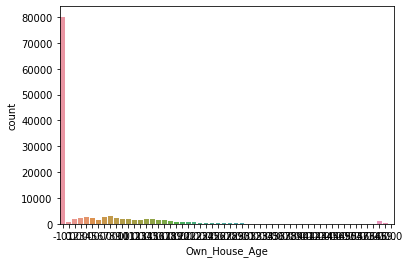

In [208]:
sns.countplot(df_cleaned['Own_House_Age'])

In [209]:
df=df.drop(columns='Own_House_Age')

In [215]:
print(df['Client_Occupation'].isna().sum())
print(df['Client_Occupation'].value_counts())
#print('Max Years : ', df['Own_House_Age'].max(), ' Min Years : ',df['Own_House_Age'].min())

0
Client_Occupation
Retired               21041
Laborers              21024
Sales                 12136
Service               11671
Core                  10611
Managers               8099
Drivers                7150
Commercial             5685
High skill tech        4317
Accountants            3766
Medicine               3172
Govt_job_others        3038
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: count, dtype: int64


In [212]:
# Filter rows where Client_Occupation is null and select Client_Marital_Status
Client_Occupation_null = df[df['Client_Occupation'].isna() & df['Client_Income_Type'].notnull()]

print("Client_Occupation_null where Client_Income_Type is not null:")
print(Client_Occupation_null['Client_Income_Type'])

Client_Occupation_null where Client_Income_Type is not null:
1         Service
3         Retired
6         Retired
7         Retired
9         Retired
           ...   
121841    Retired
121842    Retired
121843    Service
121846    Retired
121850    Retired
Name: Client_Income_Type, Length: 41435, dtype: object


In [213]:
Client_Occupation_null['Client_Income_Type'].value_counts()

Client_Income_Type
Retired            21041
Service            11671
Commercial          5685
Govt_job_others     3038
Name: count, dtype: int64

In [214]:
df['Client_Occupation'] = df['Client_Occupation'].fillna(df['Client_Income_Type'])

In [219]:
print(df['Cleint_City_Rating'].isna().sum())
print(df['Cleint_City_Rating'].value_counts())
#print('Max Years : ', df['Own_House_Age'].max(), ' Min Years : ',df['Own_House_Age'].min())

0
Cleint_City_Rating
2.0    88949
3.0    17043
1.0    15864
Name: count, dtype: int64


In [218]:
df['Cleint_City_Rating'] = df['Cleint_City_Rating'].fillna(1.0) 

In [223]:
print(df['Application_Process_Day'].isna().sum())
print(df['Application_Process_Day'].value_counts())
#print('Max Years : ', df['Own_House_Age'].max(), ' Min Years : ',df['Own_House_Age'].min())

0
Application_Process_Day
2.0    23335
3.0    20116
1.0    19712
4.0    19668
5.0    19613
6.0    13125
0.0     6287
Name: count, dtype: int64


In [224]:
print(df['Application_Process_Hour'].isna().sum())
print(df['Application_Process_Hour'].value_counts())
#print('Max Years : ', df['Own_House_Age'].max(), ' Min Years : ',df['Own_House_Age'].min())

0
Application_Process_Hour
10.0    18128
11.0    14413
12.0    12977
13.0    11765
14.0    10702
9.0     10525
15.0     9614
16.0     7739
17.0     5843
8.0      5821
18.0     3475
7.0      3441
6.0      2247
19.0     1464
5.0      1437
4.0       854
3.0       506
20.0      494
21.0      164
2.0       112
22.0       67
1.0        28
0.0        26
23.0       14
Name: count, dtype: int64


In [222]:
df['Application_Process_Day'] = df['Application_Process_Day'].fillna(df['Application_Process_Day'].mode().iloc[0])

df['Application_Process_Hour'] = df['Application_Process_Hour'].fillna(df['Application_Process_Hour'].mode().iloc[0])

In [225]:
print(df['Client_Permanent_Match_Tag'].isna().sum())
print(df['Client_Permanent_Match_Tag'].value_counts())
#print('Max Years : ', df['Own_House_Age'].max(), ' Min Years : ',df['Own_House_Age'].min())

0
Client_Permanent_Match_Tag
Yes    112454
No       9402
Name: count, dtype: int64


In [226]:
print(df['Client_Contact_Work_Tag'].isna().sum())
print(df['Client_Contact_Work_Tag'].value_counts())
#print('Max Years : ', df['Own_House_Age'].max(), ' Min Years : ',df['Own_House_Age'].min())

0
Client_Contact_Work_Tag
Yes    100015
No      21841
Name: count, dtype: int64


In [230]:
print(df['Type_Organization'].isna().sum())
print(df['Type_Organization'].value_counts())
#print('Max Years : ', df['Own_House_Age'].max(), ' Min Years : ',df['Own_House_Age'].min())

24694
Type_Organization
Business Entity Type 3    26279
Self-employed             14725
Other                      6290
Medicine                   4320
Business Entity Type 2     4126
Government                 3971
School                     3371
Trade: type 7              2979
Kindergarten               2686
Construction               2623
Business Entity Type 1     2313
Transport: type 4          2076
Trade: type 3              1338
Security                   1284
Industry: type 9           1280
Industry: type 3           1235
Housing                    1162
Military                   1031
Bank                       1012
Agriculture                1011
Industry: type 11           999
Police                      934
Postal                      834
Transport: type 2           811
Security Ministries         756
Trade: type 2               717
Restaurant                  710
Services                    570
University                  559
Transport: type 3           501
Industry: type 7

In [229]:
# Replace missing values  "XNA" with "null"
df['Type_Organization'] = df['Type_Organization'].replace('XNA' , np.nan)

In [231]:
df_exp = df[df['Type_Organization'].isna()]

In [234]:
df_exp['Client_Occupation'].value_counts()

Client_Occupation
Retired               21037
Govt_job_others         772
Laborers                594
Sales                   364
Service                 362
Core                    298
Managers                233
Drivers                 200
Commercial              171
High skill tech         136
Accountants             127
Security                 92
Medicine                 81
Cooking                  69
Cleaning                 56
Low-skill Laborers       29
Private service          26
Secretaries              14
Waiters/barmen           11
IT                        9
Realty agents             7
HR                        6
Name: count, dtype: int64

In [239]:
df['Type_Organization'].unique()

array(['Self-employed', 'Government', nan, 'Business Entity Type 3',
       'Other', 'Industry: type 3', 'Business Entity Type 2',
       'Business Entity Type 1', 'Transport: type 4', 'Construction',
       'Kindergarten', 'Trade: type 3', 'Industry: type 2',
       'Trade: type 7', 'Trade: type 2', 'Agriculture', 'Military',
       'Medicine', 'Housing', 'Industry: type 1', 'Industry: type 11',
       'Bank', 'School', 'Industry: type 9', 'Postal', 'University',
       'Transport: type 2', 'Restaurant', 'Electricity', 'Police',
       'Industry: type 4', 'Security Ministries', 'Services',
       'Transport: type 3', 'Mobile', 'Hotel', 'Security',
       'Industry: type 7', 'Advertising', 'Cleaning', 'Realtor',
       'Trade: type 6', 'Culture', 'Industry: type 5', 'Telecom',
       'Trade: type 1', 'Industry: type 12', 'Industry: type 8',
       'Insurance', 'Emergency', 'Legal Services', 'Industry: type 10',
       'Trade: type 4', 'Industry: type 6', 'Transport: type 1',
       'In

In [240]:
df_exp['Client_Occupation'].unique()

array(['Retired', 'Sales', 'Private service', 'Govt_job_others',
       'Laborers', 'Service', 'Drivers', 'Managers', 'Accountants',
       'High skill tech', 'Security', 'Commercial', 'Core',
       'Low-skill Laborers', 'Medicine', 'Cooking', 'Secretaries',
       'Waiters/barmen', 'Cleaning', 'IT', 'Realty agents', 'HR'],
      dtype=object)

In [241]:
# Define a mapping between Client_Occupation and Type_Organization
occupation_to_organization = {
    'Retired': 'Self-employed',
    'Sales': 'Sales',
    'Private service': 'Services',
    'Govt_job_others': 'Government',
    'Laborers': 'Construction',
    'Service': 'Services',
    'Drivers': 'Transport: type 1',
    'Managers': 'Managers',
    'Accountants': 'Bank',
    'High skill tech': 'IT',
    'Security': 'Security',
    'Commercial': 'Trade: type 3',
    'Core': 'Industry: type 1',
    'Low-skill Laborers': 'Construction',
    'Medicine': 'Medicine',
    'Cooking': 'Restaurant',
    'Secretaries': 'Services',
    'Waiters/barmen': 'Restaurant',
    'Cleaning': 'Cleaning',
    'IT': 'IT',
    'Realty agents': 'Realtor',
    'HR': 'Services',
}

In [247]:
# Fill null values in Type_Organization with corresponding Client_Occupation values using the mapping
df['Type_Organization'] = df.apply(
    lambda row: occupation_to_organization.get(row['Client_Occupation'], row['Type_Organization'])
    if pd.isnull(row['Type_Organization']) else row['Type_Organization'],
    axis=1
)

In [248]:
df['Type_Organization'].value_counts()

Type_Organization
Self-employed             35762
Business Entity Type 3    26279
Other                      6290
Government                 4743
Medicine                   4401
Business Entity Type 2     4126
School                     3371
Construction               3246
Trade: type 7              2979
Kindergarten               2686
Business Entity Type 1     2313
Transport: type 4          2076
Trade: type 3              1509
Security                   1376
Industry: type 9           1280
Industry: type 3           1235
Housing                    1162
Bank                       1139
Military                   1031
Agriculture                1011
Industry: type 11           999
Services                    978
Police                      934
Postal                      834
Transport: type 2           811
Restaurant                  790
Security Ministries         756
Trade: type 2               717
Industry: type 1            699
University                  559
Transport: type 3     

In [246]:
# Grouping similar Type_Organization values

group_mapping = {
    'Self-employed': 'Self-employed',
    'Business Entity Type 1': 'Business',
    'Business Entity Type 2': 'Business',
    'Business Entity Type 3': 'Business',
    'Government': 'Public Sector',
    'Military': 'Public Sector',
    'Police': 'Public Sector',
    'Security Ministries': 'Public Sector',
    'School': 'Education',
    'University': 'Education',
    'Kindergarten': 'Education',
    'Medicine': 'Healthcare',
    'Restaurant': 'Hospitality',
    'Hotel': 'Hospitality',
    'Cleaning': 'Services',
    'Services': 'Services',
    'Transport: type 1': 'Transport',
    'Transport: type 2': 'Transport',
    'Transport: type 3': 'Transport',
    'Transport: type 4': 'Transport',
    'Construction': 'Construction',
    'Agriculture': 'Agriculture',
    'Bank': 'Finance',
    'Insurance': 'Finance',
    'Telecom': 'Telecommunication',
    'IT': 'Technology',
    'Realtor': 'Real Estate',
    'Trade: type 1': 'Trade',
    'Trade: type 2': 'Trade',
    'Trade: type 3': 'Trade',
    'Trade: type 4': 'Trade',
    'Trade: type 5': 'Trade',
    'Trade: type 6': 'Trade',
    'Trade: type 7': 'Trade',
    'Industry: type 1': 'Industry',
    'Industry: type 2': 'Industry',
    'Industry: type 3': 'Industry',
    'Industry: type 4': 'Industry',
    'Industry: type 5': 'Industry',
    'Industry: type 6': 'Industry',
    'Industry: type 7': 'Industry',
    'Industry: type 8': 'Industry',
    'Industry: type 9': 'Industry',
    'Industry: type 10': 'Industry',
    'Industry: type 11': 'Industry',
    'Industry: type 12': 'Industry',
    'Industry: type 13': 'Industry',
    'Sales': 'Trade',
    'Advertising': 'Media',
    'Culture': 'Art & Culture',
    'Religion': 'Other',
    'Legal Services': 'Legal',
    'Emergency': 'Emergency Services',
    'Housing': 'Real Estate',
    'Other': 'Other'
}

In [249]:
# Apply the mapping to create a new grouped category column
df['Type_Organization_Grouped'] = df['Type_Organization'].map(group_mapping)


In [250]:
df['Type_Organization_Grouped'].

Type_Organization_Grouped
Self-employed         35762
Business              32718
Public Sector          7464
Education              6616
Other                  6327
Trade                  5993
Industry               5729
Healthcare             4401
Transport              3665
Construction           3246
Finance                1354
Real Estate            1325
Hospitality            1183
Services               1152
Agriculture            1011
Telecommunication       225
Emergency Services      207
Media                   152
Technology              145
Art & Culture           131
Legal                   119
Name: count, dtype: int64

In [251]:
print(df['Score_Source_1'].isna().sum())
print(df['Score_Source_1'].value_counts())
print('Max Value : ', df['Score_Source_1'].max(), ' Min Value : ',df['Score_Source_1'].min())

68835
Score_Source_1
0.468184    5
0.716766    5
0.592852    5
0.270675    5
0.533413    5
           ..
0.565003    1
0.499508    1
0.257442    1
0.815503    1
0.182737    1
Name: count, Length: 43968, dtype: int64
Max Value :  0.945741288  Min Value :  0.014568132


In [256]:
print(df['Score_Source_3'].isna().sum())
print(df['Score_Source_3'].value_counts())
print('Max Value : ', df['Score_Source_3'].max(), ' Min Value : ',df['Score_Source_3'].min())

26922
Score_Source_3
0.746300    567
0.694093    526
0.713631    509
0.554947    474
0.670652    470
           ... 
0.049943      1
0.037901      1
0.030539      1
0.847314      1
0.030326      1
Name: count, Length: 771, dtype: int64
Max Value :  0.896009549  Min Value :  0.000527265


In [255]:
# Convert Registration_Days to numeric, coercing errors to NaN
df['Score_Source_3'] = pd.to_numeric(df['Score_Source_3'], errors='coerce')

In [257]:
# Filter rows where Score_Source_3 is null and select Score_Source_1
Client_Score_Source_3 = df[df['Score_Source_3'].isna() & df['Score_Source_1'].notnull()]

print("Client_Score_Source_3 where Client_Income_Type is not null:")
print(Client_Score_Source_3['Score_Source_1'])

Client_Score_Source_3 where Client_Income_Type is not null:
0         0.568066
1         0.563360
16        0.654460
35        0.295306
36        0.619768
            ...   
121831    0.273106
121842    0.800564
121846    0.720885
121849    0.162760
121853    0.169049
Name: Score_Source_1, Length: 10967, dtype: float64


In [261]:
df_cleaned = df.copy()
df_cleaned['Score_Source_3'] = df_cleaned['Score_Source_3'].fillna(-1)

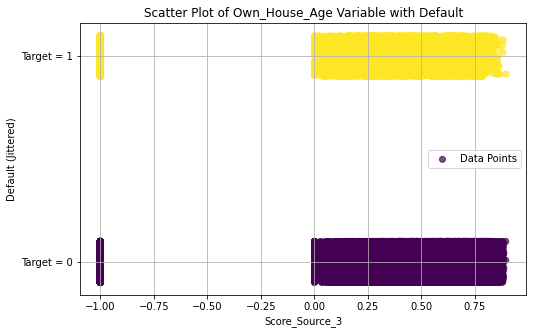

In [262]:
# Add jitter to the binary target for better visualization
jitter = np.random.uniform(-0.1, 0.1, size=len(df))
df_cleaned['binary_target_jittered'] = df_cleaned['Default'] + jitter

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df_cleaned['Score_Source_3'], df_cleaned['binary_target_jittered'], alpha=0.7, c=df_cleaned['Default'], cmap='viridis', label='Data Points')
plt.title('Scatter Plot of Own_House_Age Variable with Default')
plt.xlabel('Score_Source_3')
plt.ylabel('Default (Jittered)')
plt.yticks([0, 1], labels=['Target = 0', 'Target = 1'])
plt.grid(True)
plt.legend()
plt.show()



In [271]:
df1 = df[df['Score_Source_1'].notnull() & df['Score_Source_3'].notnull() & df['Score_Source_2'].notnull()]

In [272]:
df1['Default'].value_counts()

Default
0    37116
1     2928
Name: count, dtype: int64

In [273]:
# Melt the DataFrame to long format
df_melted = pd.melt(df1, id_vars='Default', value_vars=['Score_Source_1','Score_Source_2', 'Score_Source_3'],
                    var_name='Score_Source', value_name='Score')

In [274]:
import matplotlib
matplotlib.use('Agg')  # Non-interactive backend

<ipython-input-275-4d918fd82bd1>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


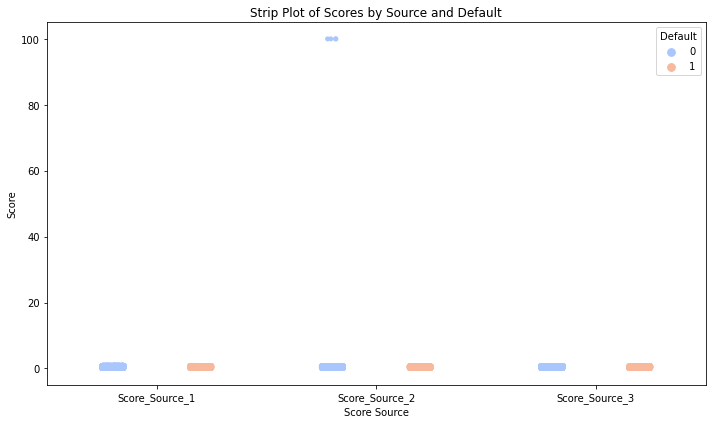

In [275]:
# Ensure there are no missing values
df_melted = df_melted.dropna()

# Use stripplot instead of swarmplot for faster plotting
plt.figure(figsize=(10, 6))
sns.stripplot(x='Score_Source', y='Score', hue='Default', data=df_melted, palette='coolwarm', dodge=True)

# Add labels and title
plt.xlabel('Score Source')
plt.ylabel('Score')
plt.title('Strip Plot of Scores by Source and Default')
plt.legend(title='Default', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [277]:
df['Score_Source_1'].head(10)

0    0.568066
1    0.563360
2         NaN
3         NaN
4    0.508199
5         NaN
6    0.729913
7    0.711468
8    0.475727
9    0.682285
Name: Score_Source_1, dtype: float64

In [278]:
print(df['Score_Source_1'].isna().sum(),df['Score_Source_2'].isna().sum(),df['Score_Source_3'].isna().sum())

68835 5686 26922


In [280]:
df=df.drop(columns='Score_Source_1')  # removing Score_Source_1 column

In [281]:
df['Score_Source_3'] = df['Score_Source_3'].fillna(df['Score_Source_3'].mean()) # imputing NAN with mean

In [282]:
df['Score_Source_3'].isna().sum()

0

In [283]:
df['Score_Source_2'] = df['Score_Source_2'].fillna(df['Score_Source_2'].mean()) # imputing NAN with mean

In [284]:
df['Score_Source_2'].isna().sum()

0

In [285]:
df['Social_Circle_Default'].isna().sum()

61928

In [286]:
df1= df.copy()

In [287]:
df1['Social_Circle_Default'] = df1['Social_Circle_Default'].fillna(0)

In [290]:
df1['Social_Circle_Default'].value_counts()

Social_Circle_Default
0    62222
1    59634
Name: count, dtype: int64

In [289]:
# Update 'Social_Circle_Default' column based on condition
df1['Social_Circle_Default'] = np.where(df1['Social_Circle_Default'] == 0, 0, 1)

<ipython-input-291-68710a9d74f9>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


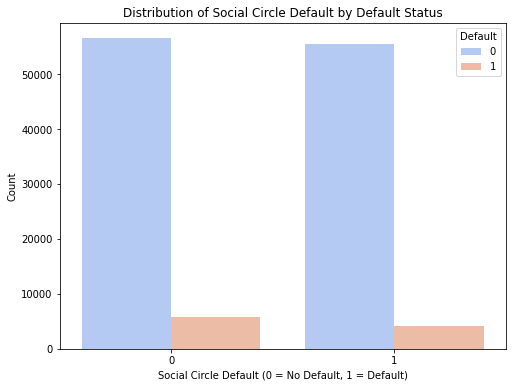

In [291]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Social_Circle_Default', hue='Default', data=df1, palette='coolwarm')

# Add labels and title
plt.xlabel('Social Circle Default (0 = No Default, 1 = Default)')
plt.ylabel('Count')
plt.title('Distribution of Social Circle Default by Default Status')
plt.legend(title='Default')
plt.show()

In [292]:
df['Social_Circle_Default'] = df['Social_Circle_Default'].fillna(0) # Imputing NAN with 0 

# Update 'Social_Circle_Default' column based on condition
df['Social_Circle_Default'] = np.where(df['Social_Circle_Default'] == 0, 0, 1)


In [294]:
print(df['Phone_Change'].isna().sum())
print(df['Phone_Change'].value_counts())

3664
Phone_Change
0.0       14555
1.0        1104
2.0         916
3.0         645
4.0         524
          ...  
3315.0        1
3410.0        1
3491.0        1
3148.0        1
3359.0        1
Name: count, Length: 3590, dtype: int64


In [295]:
df['Phone_Change'] = df['Phone_Change'].fillna(0) # Imputing NAN with 0 

In [302]:
def year_categorize(x):
    if x == 0:
        return('same_year')
    elif x == 1:
        return('one_year')
    elif x == 2:
        return('two_year')
    elif x == 3:
        return('three_year')
    elif x == 4:
        return('four_year')
    else :
        return('more_than_four')
    

In [305]:
df['Phone_Change_category'] = (df['Phone_Change']/365).astype(int).apply(year_categorize)

In [306]:
df['Phone_Change_category'].value_counts()

Phone_Change_category
same_year         39243
one_year          22168
more_than_four    19742
four_year         14710
two_year          14612
three_year        11381
Name: count, dtype: int64

In [309]:
print(df['Credit_Bureau'].isna().sum())
print(df['Credit_Bureau'].value_counts())

0
Credit_Bureau
0.0     46543
1.0     24572
2.0     19606
3.0     13102
4.0      7978
5.0      4671
6.0      2660
7.0      1421
8.0       832
9.0       422
11.0       11
10.0       10
13.0        6
14.0        6
19.0        5
15.0        3
12.0        2
17.0        2
21.0        2
22.0        1
16.0        1
Name: count, dtype: int64


In [308]:
df['Credit_Bureau'] = df['Credit_Bureau'].fillna(0) # Imputing NAN with 0

<ipython-input-310-76b35825f539>:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


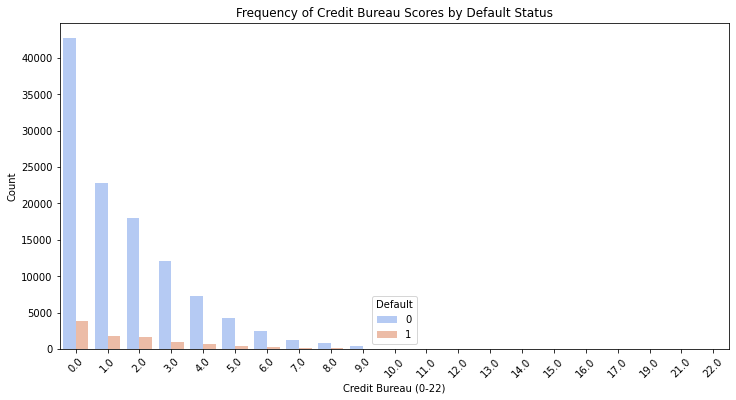

In [310]:
# Count plot for Credit_Bureau by Default
plt.figure(figsize=(12, 6))
sns.countplot(x='Credit_Bureau', hue='Default', data=df, palette='coolwarm')

# Add labels and title
plt.xlabel('Credit Bureau (0-22)')
plt.ylabel('Count')
plt.title('Frequency of Credit Bureau Scores by Default Status')
plt.xticks(rotation=45)
plt.legend(title='Default')
plt.show()

In [312]:
# Categorizing numerical to categorical

def bureau_categorize(x):
    if x == 0:
        return('no_search')
    elif x == 1:
        return('one_search')
    elif x == 2:
        return('two_search')
    else :
        return('more_than_two_search')
    

In [314]:
df['Credit_Bureau_Category'] = df['Credit_Bureau'].astype(int).apply(bureau_categorize)

In [315]:
print(df['Credit_Bureau_Category'].value_counts())

Credit_Bureau_Category
no_search               46543
more_than_two_search    31135
one_search              24572
two_search              19606
Name: count, dtype: int64


In [317]:
df.isna().sum()

ID                               0
Client_Income                    0
Car_Owned                        0
Bike_Owned                       0
Active_Loan                      0
House_Own                        0
Child_Count                   3638
Credit_Amount                 3637
Loan_Annuity                  4826
Accompany_Client                 0
Client_Income_Type               0
Client_Education                 0
Client_Marital_Status            0
Loan_Contract_Type               0
Client_Housing_Type              0
Age_Days                         0
Employed_Days                    0
Registration_Days                0
ID_Days                          0
Mobile_Tag                       0
Homephone_Tag                    0
Workphone_Working                0
Client_Occupation                0
Client_Family_Members            0
Cleint_City_Rating               0
Application_Process_Day          0
Application_Process_Hour         0
Client_Permanent_Match_Tag       0
Client_Contact_Work_